LECLAIR - EXAM 2 CQF

In [1]:
import pandas as pd
import numpy as np
import numpy.random as rnd
from scipy.stats import norm # only used to check accuracy of function
import matplotlib.pyplot as plt
import timeit # Help to monitor efficiency.
import time

In [2]:
%%HTML
# https://stackoverflow.com/questions/49888173/python-jupyter-notebook-print-dataframe-borders
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

# Define Useful function / constant

## Constant: 

### Pi constant: $\pi$

In [3]:
# Value of pi taken from: 
# http://www.math.com/tables/constants/pi.htm#:~:text=3.1415926535%208979323846%202643383279%205028841971%206939937510%205820974944%205923078164%200628620899%208628034825%203421170679%20...&text=PI%2F4%20%3D%201%2F1,1%2F7%20%2B%20...&text=PI%2F2%20%3D%202%2F1,6%2F7%20*%20...
pi = 3.1415926535897932384626433832795028841971693993751058209749445923078164
pi

3.141592653589793

#### Accuracy

In [4]:
abs(np.pi-pi)

0.0

####  Efficiency

In [5]:
%%timeit
for i in range(10**5):
    pi**100

16.5 ms ± 272 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%%timeit
for i in range(10**5):
    np.pi**100

18.6 ms ± 188 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Using the approximation seems to be slightly more efficient. 

### Euler Constant: e

In [7]:
# value of e taken from:
# https://www.math.utah.edu/~pa/math/e.html
e = 2.7182818284590452353602874713526624977572470936999595749669676277240766
e

2.718281828459045

#### Accuracy

In [8]:
np.e - e

0.0

#### Efficiency

In [9]:
%%timeit
for i in range(10**5):
    e**100

15.9 ms ± 56.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%%timeit
for i in range(10**5):
    np.e**100

18.4 ms ± 174 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Again, using an approximation seems to be slightly more efficient.

## Function

### Norm PDF

Defining a function for a standard normal distribution make the calculation more efficient. 


(i.e. Python does not need to input a value for $\mu$ and $\sigma$ as they are defined by 0 and 1 respectively)

In [11]:
def norm_pdf(x):
    """
    Standard normal probability density function
    """
    return (1.0/((2*pi)**0.5))*np.exp(-0.5*x**2)

#### Accuracy: 

Checking accuracy up to $10^{16}$ s.f. 

In [12]:
#from scipy.stats import norm 

# Check Accuracy

value_tested = np.linspace(-999,999,10000)

#df_norm_cdf = pd.DataFrame(columns=["Sympi", "Hart", "Error"])

for i in value_tested:
    if abs(norm.pdf(i)-norm_pdf(i))*10**16>1:
        print(i, norm.pdf(i)-norm_pdf(i))
    
    if abs(norm.pdf(-i)-norm_pdf(-i))*10**16>1:
        print("-i", -i, "- error",  abs(norm.pdf(-i)-norm_cdf(-i)))

#### Efficiency

In [13]:
%%time
# New Function
for i in range(10000):
    norm_pdf(i)

Wall time: 15.3 ms


In [14]:
%%time
# Scipy function
for i in range(10000):
    norm.pdf(i)

Wall time: 826 ms


As we can see the new pdf function is significantly more efficient.

### Norm CDF

In [15]:
def norm_cdf(x):
    """
    Norm CDF function # Wilmott Magazine, p 70-76, May 2005 # Graeme West
    Hart (1968)
    """
    x_abs = abs(x)
    
    if x_abs > 37:
        norm_cdf = 0
    else:
        exp_abs = e**(-0.5*x_abs**2)
        
        if x_abs < 7.07106781186547:
            k_temp = 3.52624965998911E-02 * x_abs + 0.700383064443688
            k_temp = k_temp * x_abs + 6.37396220353165
            k_temp = k_temp * x_abs + 33.912866078383
            k_temp = k_temp * x_abs + 112.079291497871
            k_temp = k_temp * x_abs + 221.213596169931
            k_temp = k_temp * x_abs + 220.206867912376
            
            
            norm_cdf = exp_abs * k_temp        
            
            
            k_temp = 8.83883476483184E-02 * x_abs + 1.75566716318264
            k_temp = k_temp * x_abs + 16.064177579207
            k_temp = k_temp * x_abs + 86.7807322029461
            k_temp = k_temp * x_abs + 296.564248779674
            k_temp = k_temp * x_abs + 637.333633378831
            k_temp = k_temp * x_abs + 793.826512519948
            k_temp = k_temp * x_abs + 440.413735824752
            norm_cdf = norm_cdf / k_temp
            
            
            
        else:
            k_temp = x_abs + 0.65
            k_temp = x_abs + 4 / k_temp
            k_temp = x_abs + 3 / k_temp
            k_temp = x_abs + 2 / k_temp
            k_temp = x_abs + 1 / k_temp
            norm_cdf = exp_abs / k_temp / 2.506628274631

    if x > 0:
        norm_cdf = 1 - norm_cdf

    return norm_cdf
    

#### Check Accuracy

In [16]:
# from scipy.stats import norm 

# Check Accuracy

value_tested = np.linspace(-999,999,10000)

#df_norm_cdf = pd.DataFrame(columns=["Sympi", "Hart", "Error"])

for i in value_tested:
    if abs(norm.cdf(i)-norm_cdf(i))*10**16>1:
        print("i", i, "- difference: ",norm.cdf(i)-norm_cdf(i))
    
    if abs(norm.cdf(-i)-norm_cdf(-i))*10**16>1:
        print("-i", -i, "- difference: ",  abs(norm.cdf(-i)-norm_cdf(-i)))

-i 4.0963096309631055 - difference:  1.1102230246251565e-16
-i 3.696669666966727 - difference:  1.1102230246251565e-16
-i 1.2988298829883433 - difference:  1.1102230246251565e-16
-i 0.6993699369937758 - difference:  1.1102230246251565e-16
-i 0.09990999099920828 - difference:  1.1102230246251565e-16
i 0.29972997299728377 - difference:  1.1102230246251565e-16
i 0.49954995499547294 - difference:  -1.1102230246251565e-16
i 0.6993699369936621 - difference:  1.1102230246251565e-16
i 1.2988298829882297 - difference:  -1.1102230246251565e-16
i 2.0981098109809864 - difference:  1.1102230246251565e-16
i 3.8964896489648027 - difference:  -1.1102230246251565e-16


In [17]:
for i in value_tested:
    if abs(norm.pdf(i)-norm_pdf(i))*10**16>1:
        print(i, norm.pdf(i)-norm_pdf(i))

#### Efficiency

In [18]:
%%timeit
# New Function
for i in range(10000):
    norm_cdf(i)

2.03 ms ± 8.98 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%%timeit
# Scipy function
for i in range(10000):
    norm.cdf(i)

680 ms ± 3.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Again, the newly defined function is significantly more efficient.

### Inverse Norm

In [20]:
def norm_inv(p):
#   Onverse normal algorithm developed by
#   P. J. Acklam.  It is accurate to 1.15E-9.
#   Could not find the original paper online. # Website link does not exist anymore. 
#   Used this as a reference. https://stackedboxes.org/2017/05/01/acklams-normal-quantile-function/

    #Define constants
    a1  = -39.6968302866538   
    a2  = 220.946098424521     
    a3  = -275.928510446969    
    a4  = 138.357751867269     
    a5  = -30.6647980661472    
    a6  = 2.50662827745924    
    
    b1  = -54.4760987982241     
    b2  = 161.585836858041     
    b3  = -155.698979859887    
    b4  = 66.8013118877197     
    b5  = -13.2806815528857    
    
    c1  = -7.78489400243029*10**(-3) 
    c2  = -0.322396458041136    
    c3  = -2.40075827716184     
    c4  = -2.54973253934373    
    c5  = 4.37466414146497      
    c6  = 2.93816398269878      
    
    d1  = 7.78469570904146*10**(-3)  
    d2  = 0.32246712907004      
    d3  = 2.445134137143        
    d4  = 3.75440866190742 
    
    #Define break points
    p_lower  = 0.02425 # lower bound
    p_upper  = 1 - p_lower  # upper bound
    
    
    if (0 < p < p_lower): #Rational approximation for lower region
        q = (-2 * np.log(p))**0.5
        norm_inverse = (((((c1 * q + c2) * q + c3) * q + c4) * q + c5) * q + c6) / ((((d1 * q + d2) * q + d3) * q + d4) * q + 1)
        
    elif (p_lower <p< p_upper): #Rational approximation for central region
        q = p - 0.5
        r = q * q
        norm_inverse = (((((a1 * r + a2) * r + a3) * r + a4) * r + a5) * r + a6) * q /(((((b1 * r + b2) * r + b3) * r + b4) * r + b5) * r + 1)
    elif (p_upper < p) and (p < 1): #Rational approximation for upper region
        q = (-2 * np.log(1 - p))**0.5
        norm_inverse = -(((((c1 * q + c2) * q + c3) * q + c4) * q + c5) * q + c6) /((((d1 * q + d2) * q + d3) * q + d4) * q + 1)
    else: #Out of valid region
        norm_inverse = np.log(-1) #invalid value

        
    return norm_inverse

In [3152]:
from scipy.stats import norm

In [3153]:
norm.ppf(0.95) - norm_inv(0.95)

1.8183099470547859e-09

In [3146]:
%%time
list_10_power_minus_9 = 0
for i in np.linspace(0.00001,0.99999,1000):
    if (abs(norm.ppf(i) - norm_inv(i))>10**-8):
        print(norm.ppf(i), norm_inv(i),abs(norm.ppf(i) - norm_inv(i)))
    if (abs(norm.ppf(i) - norm_inv(i))>10**-9):
        list_10_power_minus_9 += 1

Wall time: 246 ms


In [3147]:
list_10_power_minus_9

192

In [3148]:
len(np.linspace(0.00001,0.99999,1000))

1000

The Formula is accurate up to $10^{-8}$

In [3154]:
del norm

### Black_Schole_Merton Formula

This will be use to check accuracy of Monte Carlo method. 

In [25]:
class bsm_binary(object):
    
    
    # Cash-or-nothing
    def __init__(self, s = 100, k = 100, t= 0, T = 1, r=0.05, q=0, vol= 0.2):
    
        self.s = s   #underlying asset price
        self.k = k   #strike price
        self.t = t    #Initial time (usually t = 0)
        self.T = T  # Maturity
        self.tau = self.T-self.t #time to maturity
        self.r = r  #Risk free rate
        self.q = q # Dividend yield
        self.vol = vol #volatility
        self.d1 = (np.log(self.s/self.k) + (self.r - self.q +0.5 * self.vol **2.0) * (self.tau)) / (self.vol*(self.tau)**0.5)
        self.d2 = self.d1 - self.vol*(self.tau)**0.5
    
    
    def call(self, flag = "cash"):

        if flag == "asset":
            return S* (-self.q *(self.tau)) * norm_cdf(self.d1)
        else:
            return e**(-self.r *(self.tau)) * norm_cdf(self.d2)
    
    def put(self,flag = "cash"):
        
        if flag == "asset": 
            return S* e**(-self.q *(self.tau)) * (1 - norm_cdf(self.d1))
        else:
            return e**(-self.r*(self.tau)) * (1 - norm_cdf(self.d2))
    
    

In [26]:
(bsm_binary().put() + bsm_binary().call()) * e**(0.05)

1.0

### Box-Muller method:

In [1909]:
# Find the Random generator used. 
print(np.random.default_rng())


Generator(PCG64)


np random uses by default PCG64

In [29]:
def box_muller(N=1):
    
    #Generate two random number from the uniform distribution X~U(0,1)
    
    # return 2xN random varialbe
    u1 = np.random.rand(N)  
    u2 = np.random.rand(N)
   
    r = (-2*np.log(u1))**0.5
    theta = 2*pi*u2
    z1 = r *np.cos(theta)
    z2 = r *np.sin(theta)
     
    #out = z1,z2
    return z1, z2
    #return np.asarray(out).reshape(1,-1)

In [30]:
box_muller(2)

(array([1.07447607, 2.29240231]), array([ 0.83458082, -0.4297081 ]))

In [31]:
np.corrcoef(box_muller(100)[0], box_muller(100)[1])

array([[ 1.        , -0.02670134],
       [-0.02670134,  1.        ]])

#### Checking $Z_1$ and $Z_2$ are uncorrelated: 

In [32]:
%%time
N=10**6 
test_corr = np.zeros(N)
for i in range(N):
    test_corr[i]=np.corrcoef(box_muller(100)[0], box_muller(100)[1])[0,1]

print("the average correlation is",np.mean(test_corr)) # average of 10^6 simulation.

the average correlation is -0.0001231197822019434
Wall time: 1min 36s


This shows that the random numer Z_1, and Z_2 are uncorrelated.

#### Checking $Z_1$ and $Z_2$ are Standard Normal

In [33]:
bm_temp = box_muller(10**6)

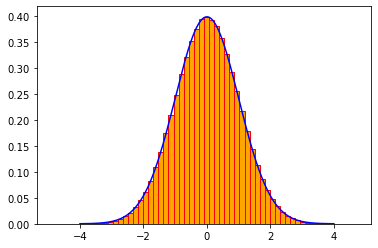

In [34]:
plt.hist(bm_temp[0], bins=60, density = True, color = "orange", edgecolor='red')
x_val = np.linspace(-4,4,10**6)
plt.plot(x_val, norm_pdf(x_val), color = "blue")
#plt.savefig("Z_1.png")

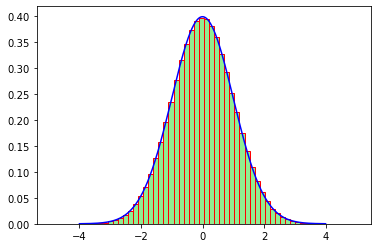

In [35]:
plt.hist(bm_temp[1], bins=60, density = True, color = "lightgreen", edgecolor='red')
x_val = np.linspace(-4,4,10**6)
plt.plot(x_val, norm_pdf(x_val), color = "blue")
#plt.savefig("Z_2.png")

This shows that the Box Muller method produce Normal Random Numbers for both Z_1 and Z_2. 

# Monte Carlo

## Numerical Method - SDE - The Euler-Maruyama Method

In [1914]:
def em_method(stock, mu,vol, tau, n, simulation,  method = "dS"):
    """
    The Euler-Maruyama Method: 
    S(t+ Delta_t) - S(t) = \mu S(t) \Delta_t + \sigma S(t) \epsilon \sqrt(Delta_t)
    Note: I am using the fact that Box Muller method provide two independent random variable to generate 
    two assets price simultaneously. 
    -------------------
    ++++ Variables+++++
    -------------------
    
    stock # scalar - initial stock price. 
    mu # scalar - drift 
    vol # scalar - volatility
    tau = time to maturity - i.e. T-t
    n - integer -  number of timestep
    method - string - "dS" or "dlnS"
    =================================
    return a (1,2n) vector
    """
    delta_t = tau/n
    #delta_w = box_muller(m) # Delta W  
    s_path=np.zeros((2 * 2,simulation,n+1))
    
    s_path[:,:,0] = stock

    
    #if vrt ==1: with Antithetic !
    if method == "dS":
        for t in range(0,n):
            delta_w = box_muller(simulation) *np.asarray(delta_t**0.5)
             
            s_path[0,:,t+1] = s_path[0,:,t]*(1 +  mu *delta_t + vol * delta_w[0] )
            s_path[1,:,t+1] = s_path[1,:,t]*(1 +  mu *delta_t + vol * -delta_w[0])
            
            s_path[2,:,t+1] = s_path[2,:,t]*(1 +  mu *delta_t + vol * delta_w[1])
            s_path[3,:,t+1] = s_path[3,:,t]*(1 +  mu *delta_t + vol * -delta_w[1] )
    
    elif method =="dlnS":
        # In practice is it usually more accurate to simulate ln S rather than S. [ref: Options, Futures, and Other Derivatives - John C. Hull]
        for t in range(0,n):
            s_path[0][t+1] = s_path[0][t] * e**((mu - (vol **2)/2) * delta_t +  delta_w[0][t] *(delta_t)**0.5)
            s_path[1][t+1] = s_path[1][t] * e**((mu - (vol **2)/2) * delta_t +  delta_w[1][t] *(delta_t)**0.5)
    
    
        
    return s_path #.flatten().reshape(1,-1)


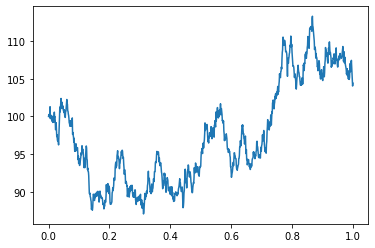

In [1918]:
N = 10**3
M = 10**3
plt.plot(np.linspace(0,1,N+1), em_method(100,0.05,0.2,1,N,M,method="dS")[0,0,:])



In [37]:
class Monte_Carlo_Naive_Call(object):
    
    #Function used to test Efficiency. 
    #The main function is further down. 
    
    
    def __init__(self,stock, strike, t, T, rate, dividend, vol, timestep, simulations):
        
        
        self.stock = stock                           # Initial Stock price
        self.strike = strike                         # Strike Price
        self.t = t                                   # Startint time: 0 ==> now , 1==> in 1 year time
        self.T = T                                   # Expiry date. 
        self.tau = self.T - self.t                   # Time to Maturity
        self.rate = rate                             # Risk free rate
        self.dividend = dividend                     # Dividend yield
        self.vol = vol                               # Volatility 
        
        
        
        self.timestep = int(timestep)
        
        
        # The Box-Muller method generate 2 sample Random i.i.d, therefore, instead of ignoring the second one, I use it to generate twice as many simulations.   

        self.simulations = int(simulations)

        
        
        self.d1 = (np.log(self.stock/self.strike) + (self.rate - self.dividend+0.5 * self.vol **2.0) * (self.tau)) / (self.vol*(self.tau)**0.5) 
        self.d2 = self.d1 - self.vol*(self.tau)**0.5
        

    
    def em_method(self):

        delta_t = self.tau/self.timestep
               


        s_path = np.zeros((self.simulations, self.timestep+1))
        s_path[:,0] = self.stock


        
        for i in range(0,self.timestep):
            delta_w = box_muller(self.simulations) * np.asarray(delta_t**0.5) # Delta W 
            s_path[:,i+1] = s_path[:,i]*(1 +  (self.rate - self.dividend) *delta_t + self.vol * delta_w[0] )
                
        return s_path #.flatten().reshape(1,-1)

    
 
    def v_option(self):
        # Idea to explore: For american option, we can use: (self.em_method()[:,:,-1] - self.strike,0).max(2) # to check
        # European call option: return mc_option = np.maximum(stock_price - self.strike,0)    
        
        
        stock_price = self.em_method()[:,-1] 

        mc_option = np.where((stock_price - self.strike)>0, 1.0,0.0)
       
     
        
        return  mc_option
         #return  (mc_option>0).astype(int) # great trick but be aware it is an integer.

    def mc_bi_price(self):
        # e^-r(T-t) * E[Payoff]
        
        return e**(-self.rate * self.tau) * self.v_option().mean()
    
    
    def bsm_binary(self):

        return e**(-self.rate *(self.tau)) * norm_cdf(self.d2)


    def variance_estimate(self):
        return np.var(e**(-self.rate * self.tau) * self.v_option(), ddof=1) # ddof ==> n-1 (sample / NOT POPULATION)
        
            
    def standard_error(self):
        
        return ((self.variance_estimate())**0.5) *(self.simulations)**(-0.5) 
    # Wrong! need to amend simulations
    
    def confidence_interval(self,alpha=0.05):
        # Default, alpha = 5%
        # I use P. Acklam's algorithm to approximate the inverse function and and buildthe Confidence interval. 
        # https://stackedboxes.org/2017/05/01/acklams-normal-quantile-function/
        
        p = 1 - alpha/2 # alpha := confidence level. 
        return [formatting(self.mc_bi_price() - norm_inv(p) *self.standard_error()), formatting(self.mc_bi_price() + norm_inv(p) *self.standard_error())]
    
              


In [38]:
Monte_Carlo_Naive_Call(stock=100, strike=100, t=0, T=1, rate=0.05, dividend=0, vol=0.2, timestep=100, simulations=100).em_method()

array([[100.        , 101.11434952, 101.24463823, ..., 113.69165745,
        110.60301001, 108.30647398],
       [100.        , 101.33492068, 104.75244507, ...,  94.67650635,
         95.54754656,  96.56109913],
       [100.        ,  98.78536001, 100.65421187, ...,  96.97481509,
         93.62829875,  91.87520434],
       ...,
       [100.        , 100.32055165,  96.52536798, ..., 108.82652163,
        107.33082017, 108.07975002],
       [100.        , 101.5790278 , 102.99615114, ...,  93.562614  ,
         97.60143179,  99.92601247],
       [100.        ,  99.53338256,  98.8833996 , ..., 133.49164497,
        131.07641505, 132.77951006]])

In [39]:
Monte_Carlo_Naive_Call(stock=100, strike=100, t=0, T=1, rate=0.05, dividend=0, vol=0.2, timestep=100, simulations=100).mc_bi_price()

0.551713066210414

In [40]:
Monte_Carlo_Naive_Call(stock=100, strike=100, t=0, T=1, rate=0.05, dividend=0, vol=0.2, timestep=100, simulations=100).standard_error()

0.04764786815587154

# Implementation

Define Monte_Carlo Class. 

In [2292]:
def formatting(x):
    return float("{:.6e}".format(x))
#    return float('{:.5f}'.format(x))

In [3158]:
int(1/2)

0

In [2388]:
class Monte_Carlo(object):
    
    """
    em_method(): Simulate 2 x (number of simulations)
    arr_payoff(): Return payoff of each path. 
    mc_bi_price(): Return Monte Carlo estimated price. 
    bsm_binary(): Return Black-Scholes-Merton price for a binary option.
    standard_error(): Return Standard Error. 
    confidence_interval(): Calculate Confidence Interval for a given confience level
    mc_process
    
    
    ================================

    
    
    """
    
    def __init__(self,stock, strike, t, T, rate, dividend, vol,
                 timestep, simulations, method = "dlnS", cash_f = "cash",
                 flag = "call", antithetic = False):
        
        
        self.stock = stock                           # Initial Stock price
        self.strike = strike                         # Strike Price
        self.t = t                                   # Startint time: 0 ==> now , 1==> in 1 year time
        self.T = T                                   # Expiry date. 
        self.tau = self.T - self.t                   # Time to Maturity
        self.rate = rate                             # Risk free rate
        self.dividend = dividend                     # Dividend yield
        self.vol = vol                               # Volatility 
        
        
        
        self.timestep = int(timestep)
        
        
        # The Box-Muller method generate 2 sample Random i.i.d
        # therefore, instead of ignoring the second one,
        # I use it to generate twice as many simulations.   
        
        self.simulations = int(simulations/2) # 2n simulattions in reality!
        #self.simulations = int(simulations)
        self.cash_f = cash_f #.lower() # "cash" or "asset"
        self.flag = flag #.lower() # Flag for "call" or "put"
        self.method = method                # dS for normal random walk
                                            # dlnS for lognormal random walk
        self.antithetic = antithetic        # Bolean: True / False
        
        
        self.d1 = (np.log(self.stock/self.strike) +
                   (self.rate - self.dividend+0.5 * self.vol **2.0) * (self.tau)) / (self.vol*(self.tau)**0.5) 
        self.d2 = self.d1 - self.vol*(self.tau)**0.5
        
        self.asset_path = 0                 # Constant used to store path so I can calculuate 
                                            # the corresponding error  
        self.option_array = 0               # Same as above //for option price
        self.s_error = 0                    # Used to keep track for Standard Error
        self.r_error = 0                    # Used to keep track for Relative Error
        self.start_time = 0                 # Used to keep track of time taken for the function to execute.
        self.runtime = 0                    # Total time taken.
        self.df = pd.DataFrame(data=None, index= ["BSM Price", "Estimated Price",
                               "Standard Error", "Relative Error",
                                "Absolute Error","Runtime"], columns= [self.method])
        self.ci = 0

        
        
    
    
    def em_method(self):
        """
        The Euler-Maruyama Method:         
        """
        
        
        self.start_time = timeit.default_timer() ## Start time.
        
        delta_t = self.tau/self.timestep
        
        
        #If Antithetic Method used. 
        if self.antithetic == True:
            s_path = np.zeros((2 * 2,self.simulations, self.timestep+1)) #  
            s_path[:,:,0] = self.stock


            if self.method == "dS": #antithetic
                for i in range(0,self.timestep):
                    delta_w = box_muller(self.simulations) * np.asarray(delta_t**0.5) # Delta W 
                    s_path[0,:,i+1] = s_path[0,:,i]*(1 +  (self.rate - self.dividend) *delta_t + self.vol * delta_w[0] ) # f1 
                    s_path[1,:,i+1] = s_path[1,:,i]*(1 +  (self.rate - self.dividend) *delta_t - self.vol * delta_w[0] ) # f2 //  antithetic

                    s_path[2,:,i+1] = s_path[2,:,i]*(1 +  (self.rate - self.dividend) *delta_t + self.vol * delta_w[1] ) # f3
                    s_path[3,:,i+1] = s_path[3,:,i]*(1 +  (self.rate - self.dividend) *delta_t - self.vol * delta_w[1] ) # f4 /antithetic
                    
                    
            elif self.method == "dlnS": #antithetic
                # In practice is it usually more accurate to simulate ln S rather than S. [ref: Paul Willmott on Quantitative Finance. Vol.3 Part 6 Chapter 80]
                for i in range(0,self.timestep):
                    delta_w = box_muller(self.simulations) * np.asarray(delta_t**0.5) # Delta W
                    s_path[0,:,i+1] = s_path[0,:,i]* e**(((self.rate - self.dividend) - (self.vol**2)/2) * delta_t +
                                                         self.vol * delta_w[0] ) # f1
                    s_path[1,:,i+1] = s_path[1,:,i]* e**(((self.rate - self.dividend) - (self.vol**2)/2) * delta_t -
                                                         self.vol * delta_w[0] ) # f2 //  antithetic 
                    
                    s_path[2,:,i+1] = s_path[2,:,i]* e**(((self.rate - self.dividend) - (self.vol**2)/2) * delta_t +
                                                         self.vol * delta_w[1] ) # f3
                    s_path[3,:,i+1] = s_path[3,:,i]* e**(((self.rate - self.dividend) - (self.vol**2)/2) * delta_t -
                                                         self.vol * delta_w[1] ) # f4 // antithetic
                    
                    

            else:
                print("Wrong method, try dlnS")
        
            
        else: #standard Monte Carlo
            
            
            s_path = np.zeros((2,self.simulations, self.timestep+1))
            s_path[:,:,0] = self.stock


            if self.method == "dS":
                for i in range(0,self.timestep):
                    delta_w = box_muller(self.simulations) * np.asarray(delta_t**0.5) # Delta W 
                    s_path[0,:,i+1] = s_path[0,:,i]*(1 +  (self.rate - self.dividend) *delta_t + self.vol * delta_w[0] )
                    s_path[1,:,i+1] = s_path[1,:,i]*(1 +  (self.rate - self.dividend) *delta_t + self.vol * delta_w[1] )
                    
                    
                    

            elif self.method == "dlnS":
                # In practice is it usually more accurate to simulate ln S rather than S. [ref: Paul Willmott on Quantitative Finance. Vol.3 Part 6 Chapter 80]
                for i in range(0,self.timestep):
                    delta_w = box_muller(self.simulations) * np.asarray(delta_t**0.5) # Delta W
                    s_path[0,:,i+1] = s_path[0,:,i] * e**(((self.rate - self.dividend) - (self.vol **2)/2) * delta_t +
                                                          self.vol * delta_w[0] )
                    
                    
                    s_path[1,:,i+1] = s_path[1,:,i] * e**(((self.rate - self.dividend) - (self.vol **2)/2) * delta_t +
                                                         self.vol * delta_w[1] )

                
            else:
                print("Wrong method, try dlnS")

        
        self.asset_path = s_path

        #return s_path #.flatten().reshape(1,-1)
        return self.asset_path
    

    def arr_payoff(self):
        
        """
        Return array of payoff for each path.
        """
        
        
        # Idea to explore: For american option, we can use: (self.em_method()[:,:,-1] - self.strike,0).max(2) # to check
        # European call option: return mc_option = np.maximum(stock_price - self.strike,0)    
        
        
        #stock_price = self.em_method()[:,:,-1] # Old version
        stock_price = self.asset_path[:,:,-1] # potential improvement
        
        
        
        if self.cash_f == "asset": 
            
            if self.flag == "call":
                mc_option = np.where(stock_price - self.strike>0, stock_price ,0)

            elif self.flag == "put":
                mc_option = np.where(stock_price - self.strike<0, stock_price,0)
            
            else:
                return "Wrong Flag"
            
            
            
        elif self.cash_f =="cash": 
            
            if self.flag == "call":
                mc_option = np.where((stock_price - self.strike)>0, 1.0,0.0)
                #mc_option = np.maximum(stock_price - self.strike,0)

            elif self.flag == "put":
                #mc_option = np.maximum(self.strike - stock_price,0)
                mc_option = np.where((stock_price - self.strike)<0, 1.0,0.0)
            
            else:
                return "Wrong Flag"
           
        else:
            return "Please specify the type of binary option"
        
        self.option_array = e**(-self.rate * self.tau) * mc_option
        return   self.option_array
        #return e**(-self.rate * self.tau) * mc_option
        #return  (mc_option>0).astype(int)     
        

    
    def mc_bi_price(self):
        
        """
        Return average of payoff.
        """
        # e^-r(T-t) * E[Payoff]
        
        #return  self.arr_payoff().mean() # old version
        temp =  self.option_array.mean()
        self.runtime = timeit.default_timer() - self.start_time # Stop timer
        return temp
    

    def bsm_binary(self):
        """
        Black-Scholes-Merton Formula for binary Option.
        
        """
        if self.flag == "call":
            
            if self.cash_f == "asset": # asset or nothing
                return self.stock * e**(-self.dividend *(self.tau)) * norm_cdf(self.d1)
            else: #cash or nothing
                return e**(-self.rate *(self.tau)) * norm_cdf(self.d2)
        
        elif self.flag == "put":

            if self.cash_f == "asset": #Asset or nothing
                return self.stock* e**(-self.dividend *(self.tau)) * (1 - norm_cdf(self.d1))
            else: # Cash or Nothing
                return e**(-self.rate*(self.tau)) * (1 - norm_cdf(self.d2))
            
    
    """
    @property
    def s_error(self):
        variance_estimate = np.var(self.option_array, ddof=1)
        return (variance_estimate/self.option_array.size)**0.5
    """
            
            
         
    def standard_error(self):
        
        
        variance_estimate = np.var(self.option_array, ddof=1)
        # ddof ==> n-1 (sample / NOT POPULATION)
        self.s_error = (variance_estimate/self.option_array.size)**0.5 
        return self.s_error
    
    
    def relative_error(self):
        
        self.r_error = self.s_error/self.option_array.mean()
        return self.r_error
        
    
    
    def confidence_interval(self,alpha=0.05):
        # Default, alpha = 5%
        # I use P. Acklam's algorithm to approximate the inverse function and and buildthe Confidence interval. 
        # https://stackedboxes.org/2017/05/01/acklams-normal-quantile-function/
        
        p = 1 - alpha/2 # alpha := confidence level. 
        self.ci = [formatting(self.option_array.mean() - norm_inv(p) *self.standard_error()),
                formatting(self.option_array.mean() + norm_inv(p) *self.standard_error())]
        
        return self.ci
    
    def total_runtime(self):
        return self.runtime 
              

    def mc_process(self):
        """
        Summarise Results
        """
        
        self.em_method()
        self.arr_payoff()
        self.df.loc["Estimated Price"] = self.mc_bi_price()
        self.df.loc["BSM Price"] = self.bsm_binary()
        self.df.loc["Standard Error"] = self.standard_error()
        self.df.loc["Relative Error"] = self.relative_error()
        self.df.loc["Absolute Error"] = abs(self.df.loc["Estimated Price"] - self.df.loc["BSM Price"])
        self.df.loc["Runtime"] = self.total_runtime()
        #self.df.columns = [col_name]
       
        return self.df

In [1843]:
a = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 10**1, simulations= 10**3,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)

In [1844]:
a.em_method()
a.arr_payoff()
print(a.bsm_binary())
print(a.mc_bi_price())
print(a.standard_error())
print(a.relative_error())
print(a.total_runtime())

0.5323248154537634
0.5336397071449005
0.014935378133695663
0.02798775640891397
0.001786000095307827


In [1547]:
a.mc_process()

,dlnS
BSM Price,0.532325
Estimated Price,0.53792
Standard Error,0.0105461
Relative Error,0.0196052
Absolute Error,0.00559542
Runtime,0.0036127


## Procedure

In [2934]:
mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 10**2, simulations= 2,
                method = "dS", cash_f = "cash", flag = "call", antithetic = False)

In [1656]:
# mc_path = mc.em_method()

In [1672]:
mc_path[0,0,:][-1]

113.42986696149215

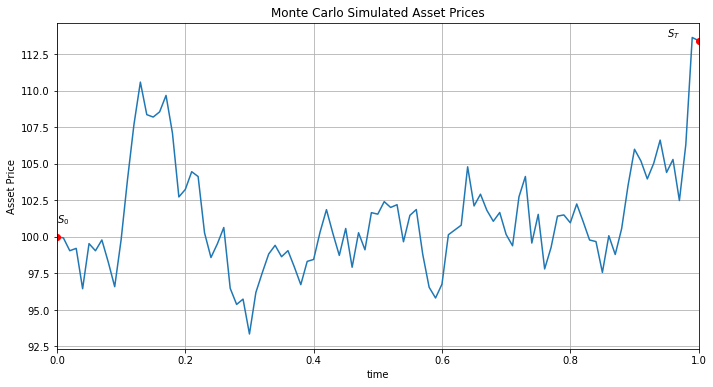

In [2808]:
# Step 1 - Simulate a sample path.

plt.figure(figsize=(11.5, 6))
n = mc_path.shape[-1]
plt.plot(np.linspace(0,1,n), mc_path[0,0,:])
#plt.plot(np.linspace(0,1,n), [100]*n, "--", alpha = 0.8, color = "red")

plt.plot(0.0,100,'ro') 
plt.text(0,101,"$S_0$")

plt.plot(1.0,mc_path[0,0,:][-1],"ro")
plt.text(1.0-0.05,mc_path[0,0,:][-1]+0.25,"$S_T$")

plt.xlabel('time')
plt.grid(True)
plt.ylabel('Asset Price')
plt.title('Monte Carlo Simulated Asset Prices');
plt.xlim(0,1)
plt.savefig('Image/Step 1 - Path S.png')

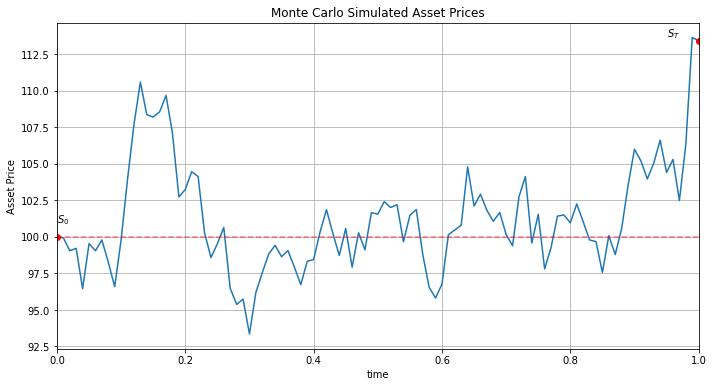

In [2809]:
# Step 2 - Calculate Payoff.

plt.figure(figsize=(11.5, 6))

n = mc_path.shape[-1]
plt.plot(np.linspace(0,1,n), mc_path[0,0,:])
plt.plot(np.linspace(0,1,n), [100]*n, "--", alpha =0.5, color = "red")


plt.plot(0.0,100,'ro') 
plt.text(0,101,"$S_0$")

plt.plot(1.0,mc_path[0,0,:][-1],"ro")
plt.text(1.0-0.05,mc_path[0,0,:][-1]+0.25,"$S_T$")


plt.xlabel('time')
plt.grid(True)
plt.ylabel('Asset Price')
plt.title('Monte Carlo Simulated Asset Prices');
plt.xlim(0,1)
plt.savefig('Image/Step 2 - Payoff.png')

(0.0, 1.0)

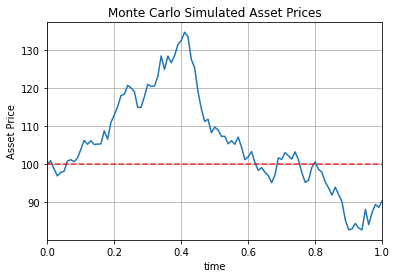

In [2824]:
# Simulate a sample path.
n = mc.em_method().shape[-1]
plt.plot(np.linspace(0,1,n), mc.em_method()[0,0,:])
plt.plot(np.linspace(0,1,n), [100]*n, "--", alpha = 0.8, color = "red")


plt.xlabel('time')
plt.grid(True)
plt.ylabel('Asset Price')
plt.title('Monte Carlo Simulated Asset Prices');
plt.xlim(0,1)
# plt.savefig('Image/Step 1 - Path S.png')

In [2804]:
mc.em_method()[0,0]

array([100.        ,  96.13533064])

In [2819]:
mc.em_method()

array([], shape=(2, 0, 101), dtype=float64)

(0.0, 1.0)

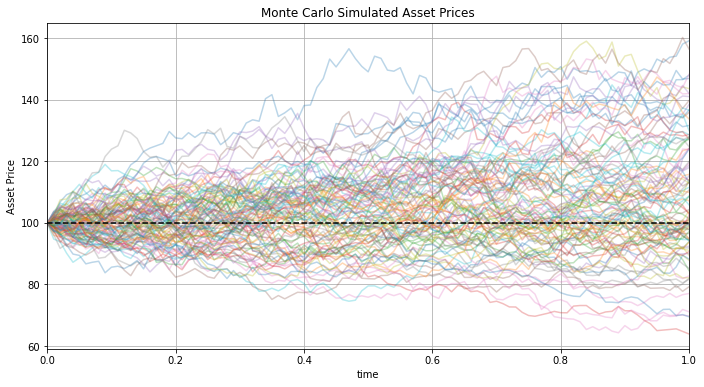

In [2941]:

plt.figure(figsize=(11.5, 6))
n = mc.em_method().shape[-1]
for i in range(100):
    
    plt.plot(np.linspace(0,1,n), mc.em_method()[0,0,:], alpha = 0.3)



plt.plot(np.linspace(0,1,n), [100]*n, "--", alpha = 1, color = "black")
plt.xlabel('time')
plt.grid(True)
plt.ylabel('Asset Price')
plt.title('Monte Carlo Simulated Asset Prices');
plt.xlim(0,1)

#plt.savefig('Image/Step 3 - Path S.png')

## Results

In [2382]:
mc_call_cash = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= 100000,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)


mc_put_cash = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= 100000,
                method = "dlnS", cash_f = "cash", flag = "put", antithetic = False)


mc_call_asset = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= 100000,
                method = "dlnS", cash_f = "asset", flag = "call", antithetic = False)


mc_put_asset = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= 100000,
                method = "dlnS", cash_f = "asset", flag = "put", antithetic = False)




In [2385]:
df_results = pd.DataFrame()

df_results = pd.concat([df_results, mc_call_cash.mc_process()], axis = 1)
df_results = pd.concat([df_results, mc_put_cash.mc_process()], axis = 1)
df_results = pd.concat([df_results, mc_call_asset.mc_process()], axis = 1)
df_results = pd.concat([df_results, mc_put_asset.mc_process()], axis = 1)

df_results.columns = ["Cash - Call", "Cash - Put", "Asset - Call", "Asset - Put"]

In [2386]:
df_results.applymap(formatting)

,Cash - Call,Cash - Put,Asset - Call,Asset - Put
BSM Price,0.532325,0.418905,63.683070,36.316930
Estimated Price,0.530938,0.416610,63.234330,36.413050
Standard Error,0.001494,0.001492,0.182326,0.130923
Relative Error,0.002814,0.003582,0.002883,0.003596
Absolute Error,0.001387,0.002295,0.448731,0.096111
Runtime,0.008089,0.006687,0.006539,0.006972


In [2387]:
print(df_results.applymap(formatting).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Cash - Call &  Cash - Put &  Asset - Call &  Asset - Put \\
\midrule
BSM Price       &     0.532325 &    0.418905 &     63.683070 &    36.316930 \\
Estimated Price &     0.530938 &    0.416610 &     63.234330 &    36.413050 \\
Standard Error  &     0.001494 &    0.001492 &      0.182326 &     0.130923 \\
Relative Error  &     0.002814 &    0.003582 &      0.002883 &     0.003596 \\
Absolute Error  &     0.001387 &    0.002295 &      0.448731 &     0.096111 \\
Runtime         &     0.008089 &    0.006687 &      0.006539 &     0.006972 \\
\bottomrule
\end{tabular}



## Normal  Versus Log Normal Random Walk

In [3072]:
%%time
df_ds = pd.DataFrame()
for i in np.arange(10,100000,1000):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 10**2, simulations= i,
                method = "dS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] # formatting 3 significant figure
    df_ds = pd.concat([df_ds, df1], axis=1)
    
df_ds.columns.name = "dS"   

Wall time: 19.1 s


In [3073]:
%%time
df_dlns = pd.DataFrame()
for i in np.arange(10,100000,1000):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 10**2, simulations= i,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] # formatting 3 significant figure
    df_dlns = pd.concat([df_dlns, df1], axis=1)
    
df_dlns.columns.name = "dlnS"   

Wall time: 33.4 s


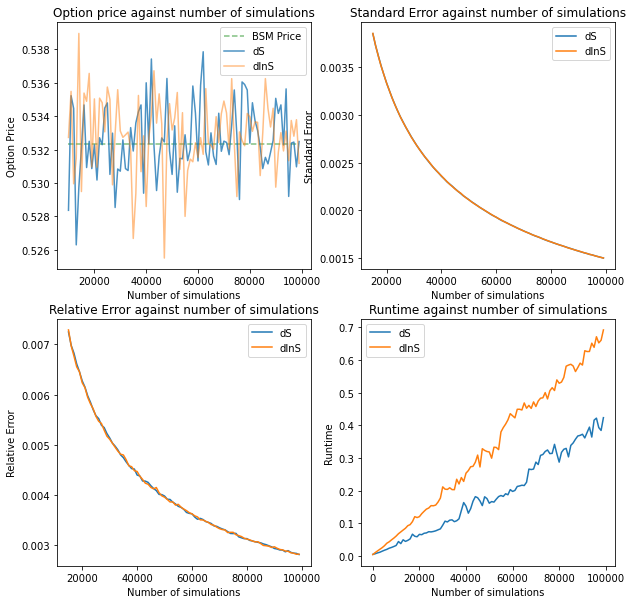

In [3098]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))


axs[0, 0].plot(df_ds.columns[10:], df_ds.loc["BSM Price"].values[10:],'--',
               color = "green", alpha = 0.5, label = "BSM Price")

axs[0, 0].plot(df_ds.columns[10:], df_ds.loc["Estimated Price"].values[10:],
               '-', alpha = 0.8, label = "dS")
axs[0, 0].plot(df_dlns.columns[10:], df_dlns.loc["Estimated Price"].values[10:],
               '-',  alpha = 0.5, label = "dlnS")
axs[0, 0].set_title("Option price against number of simulations")
axs[0, 0].legend()


#Standard Error
axs[0, 1].plot(df_ds.columns[15:], df_ds.loc["Standard Error"].values[15:], label = "dS")
axs[0, 1].plot(df_dlns.columns[15:], df_dlns.loc["Standard Error"].values[15:], label = "dlnS")
axs[0, 1].set_title("Standard Error against number of simulations")
axs[0, 1].legend()

#Relative Error
axs[1, 0].plot(df_ds.columns[15:], df_ds.loc["Relative Error"].values[15:], label = "dS")
axs[1, 0].plot(df_dlns.columns[15:], df_dlns.loc["Relative Error"].values[15:], label = "dlnS")
axs[1, 0].set_title("Relative Error against number of simulations")
axs[1,0].legend()

#Runtime
axs[1, 1].plot(df_ds.columns, df_ds.loc["Runtime"].values, label = "dS")
axs[1, 1].plot(df_dlns.columns, df_dlns.loc["Runtime"].values, label = "dlnS")
axs[1, 1].set_title("Runtime against number of simulations")
axs[1, 1].legend()



plt.setp(axs[:, :], xlabel='Number of simulations')
plt.setp(axs[0, 0], ylabel='Option Price')
plt.setp(axs[0, 1], ylabel='Standard Error')
plt.setp(axs[1, 0], ylabel='Relative Error')
plt.setp(axs[1, 1], ylabel='Runtime')

#plt.savefig('Image/dS Vs dlnS - 100 timestep.png')

### Multi time step. $\Delta t = \frac{T}{100}$

Using 100 timestep ($dt = \frac{T}{100}$ and 200,000 simulations). \\

Please note that the Class Monte_Carlo generates 2 $\times$ the number of simulations as it is using the Box-Muller algorithm to produces two Standard Normal Random variable (from two standard Uniform RV). 

In [3083]:
%%time
df_ds_100 = pd.DataFrame()
for i in np.arange(10,100000,1000):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 10**2, simulations= i,
                method = "dS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] # formatting 3 significant figure
    df_ds_100 = pd.concat([df_ds_100, df1], axis=1)
    
df_ds_100.columns.name = "dS"   

Wall time: 19 s


In [3084]:
%%time
df_dlns_100 = pd.DataFrame()
for i in np.arange(10,100000,1000):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 10**2, simulations= i,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] # formatting 3 significant figure
    df_dlns_100 = pd.concat([df_dlns_100, df1], axis=1)
    
df_dlns_100.columns.name = "dlnS"   

Wall time: 32.7 s


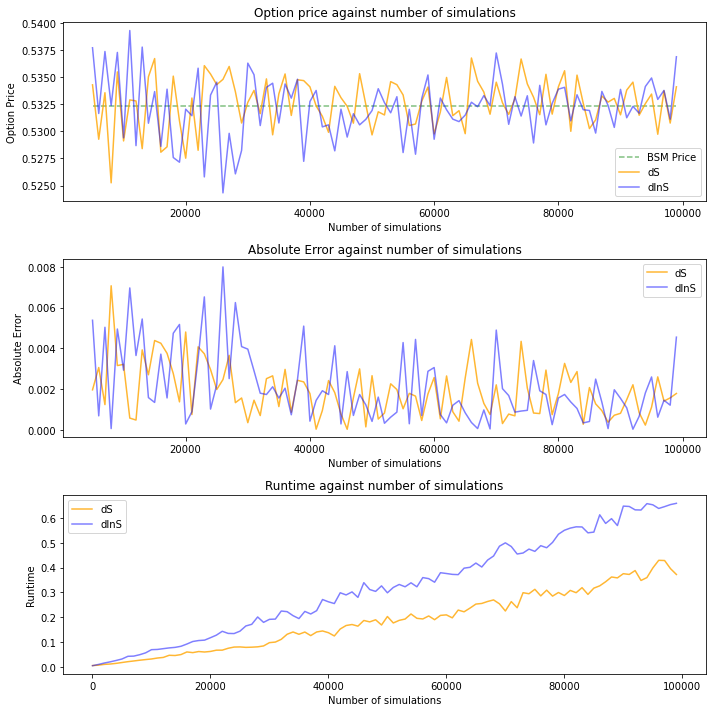

In [3099]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))


#Option Price
axs[0].plot(df_ds_100.columns[5:], df_ds_100.loc["BSM Price"].values[5:],'--',
               color = "green", alpha = 0.5, label = "BSM Price")

axs[0].plot(df_ds_100.columns[5:], df_ds_100.loc["Estimated Price"].values[5:],
               '-', color = "orange", alpha = 0.8, label = "dS")
axs[0].plot(df_dlns_100.columns[5:], df_dlns_100.loc["Estimated Price"].values[5:],
               '-', color = "blue", alpha = 0.5, label = "dlnS")
axs[0].set_title("Option price against number of simulations")
axs[0].legend()

#Absolute Error
axs[1].plot(df_ds_100.columns[5:], df_ds_100.loc["Absolute Error"].values[5:],
            '-', color = "orange", alpha = 0.8, label = "dS")
axs[1].plot(df_dlns_100.columns[5:], df_dlns_100.loc["Absolute Error"].values[5:],
            '-', color = "blue", alpha = 0.5, label = "dlnS")
axs[1].set_title("Absolute Error against number of simulations")
axs[1].legend()

axs[2].plot(df_ds_100.columns, df_ds_100.loc["Runtime"].values,
            '-', color = "orange", alpha = 0.8, label = "dS")
axs[2].plot(df_dlns_100.columns, df_dlns_100.loc["Runtime"].values,
            '-', color = "blue", alpha = 0.5, label = "dlnS")
axs[2].set_title("Runtime against number of simulations")
axs[2].legend()



plt.setp(axs[:], xlabel='Number of simulations')
plt.setp(axs[0,], ylabel='Option Price')
plt.setp(axs[1,], ylabel='Absolute Error')
plt.setp(axs[2], ylabel='Runtime')

# for ax in axs.flat:
#     ax.label_outer()

fig.tight_layout()

#plt.savefig('Image/dS Vs dlnS - 100 timestep - Price, Abs Error, Runtime.png')

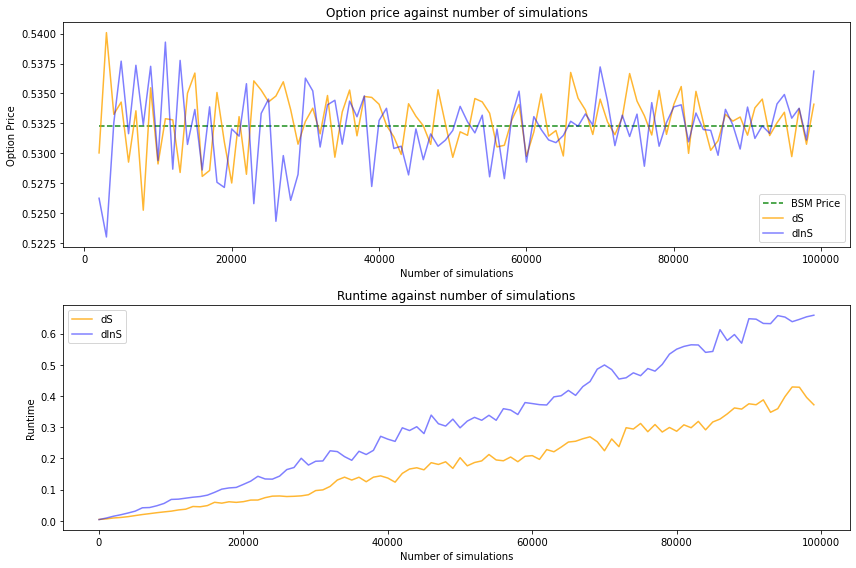

In [3113]:
fig, axs = plt.subplots(2, 1, figsize=(12,8))


axs[0].plot(df_ds_100.columns[2:], df_ds_100.loc["BSM Price"].values[2:],'--',
               color = "green", alpha = 0.9, label = "BSM Price")

axs[0].plot(df_ds_100.columns[2:], df_ds_100.loc["Estimated Price"].values[2:],
               '-', color = "orange", alpha = 0.8, label = "dS")
axs[0].plot(df_dlns_100.columns[2:], df_dlns_100.loc["Estimated Price"].values[2:],
               '-', color = "blue", alpha = 0.5, label = "dlnS")
axs[0].set_title("Option price against number of simulations")
axs[0].legend()



axs[1].plot(df_ds_100.columns, df_ds_100.loc["Runtime"].values,
            '-', color = "orange", alpha = 0.8, label = "dS")
axs[1].plot(df_dlns_100.columns, df_dlns_100.loc["Runtime"].values,
            '-', color = "blue", alpha = 0.5, label = "dlnS")
axs[1].set_title("Runtime against number of simulations")
axs[1].legend()



plt.setp(axs[:], xlabel='Number of simulations')
plt.setp(axs[0,], ylabel='Option Price')
plt.setp(axs[1], ylabel='Runtime')

# for ax in axs.flat:
#     ax.label_outer()

fig.tight_layout()

#plt.savefig('Image/dS Vs dlnS - 100 timestep - Price and Runtime.png')

### One Giant leap - $\Delta t = T$

In [3114]:
%%time
df_ds_1 = pd.DataFrame()
for i in np.arange(10,100000,1000):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= i,
                method = "dS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] # formatting 3 significant figure
    df_ds_1 = pd.concat([df_ds_1, df1], axis=1)
    
df_ds_1.columns.name = "dS"   

Wall time: 400 ms


In [3115]:
%%time
df_dlns_1 = pd.DataFrame()
for i in np.arange(10,100000,1000):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= i,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] 
    df_dlns_1 = pd.concat([df_dlns_1, df1], axis=1)
    
df_dlns_1.columns.name = "dlnS"   

Wall time: 540 ms


[Text(0, 0.5, 'Runtime')]

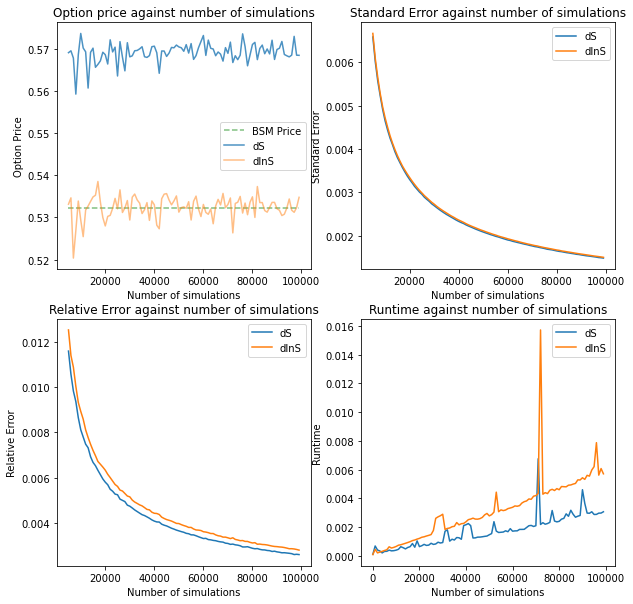

In [3116]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))


axs[0, 0].plot(df_ds_1.columns[5:], df_ds_1.loc["BSM Price"].values[5:],'--',
               color = "green", alpha = 0.5, label = "BSM Price")

axs[0, 0].plot(df_ds_1.columns[5:], df_ds_1.loc["Estimated Price"].values[5:],
               '-', alpha = 0.8, label = "dS")
axs[0, 0].plot(df_dlns_1.columns[5:], df_dlns_1.loc["Estimated Price"].values[5:],
               '-',  alpha = 0.5, label = "dlnS")
axs[0, 0].set_title("Option price against number of simulations")
axs[0, 0].legend()

axs[0, 1].plot(df_ds_1.columns[5:], df_ds_1.loc["Standard Error"].values[5:], label = "dS")
axs[0, 1].plot(df_dlns_1.columns[5:], df_dlns_1.loc["Standard Error"].values[5:], label = "dlnS")
axs[0, 1].set_title("Standard Error against number of simulations")
axs[0, 1].legend()

axs[1, 0].plot(df_ds_1.columns[5:], df_ds_1.loc["Relative Error"].values[5:], label = "dS")
axs[1, 0].plot(df_dlns_1.columns[5:], df_dlns_1.loc["Relative Error"].values[5:], label = "dlnS")
axs[1, 0].set_title("Relative Error against number of simulations")
axs[1,0].legend()


axs[1, 1].plot(df_ds_1.columns, df_ds_1.loc["Runtime"].values, label = "dS")
axs[1, 1].plot(df_dlns_1.columns, df_dlns_1.loc["Runtime"].values, label = "dlnS")
axs[1, 1].set_title("Runtime against number of simulations")
axs[1, 1].legend()



plt.setp(axs[:, :], xlabel='Number of simulations')
plt.setp(axs[0, 0], ylabel='Option Price')
plt.setp(axs[0, 1], ylabel='Standard Error')
plt.setp(axs[1, 0], ylabel='Relative Error')
plt.setp(axs[1, 1], ylabel='Runtime')

#plt.savefig('Image/dS Vs dlnS - one giant leap vs multi step ds - summary.png')

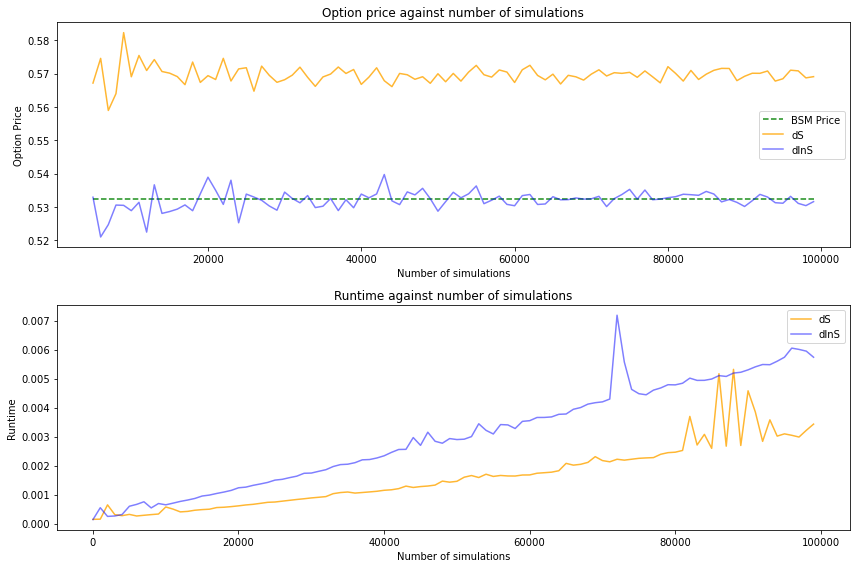

In [3110]:
fig, axs = plt.subplots(2, 1, figsize=(12,8))


axs[0].plot(df_ds_1.columns[5:], df_ds_1.loc["BSM Price"].values[5:],'--',
               color = "green", alpha = 0.9, label = "BSM Price")

axs[0].plot(df_ds_1.columns[5:], df_ds_1.loc["Estimated Price"].values[5:],
               '-', color = "orange", alpha = 0.8, label = "dS")
axs[0].plot(df_dlns_1.columns[5:], df_dlns_1.loc["Estimated Price"].values[5:],
               '-', color = "blue", alpha = 0.5, label = "dlnS")
axs[0].set_title("Option price against number of simulations")
axs[0].legend()



axs[1].plot(df_ds_1.columns, df_ds_1.loc["Runtime"].values,
            '-', color = "orange", alpha = 0.8, label = "dS")
axs[1].plot(df_dlns_1.columns, df_dlns_1.loc["Runtime"].values,
            '-', color = "blue", alpha = 0.5, label = "dlnS")
axs[1].set_title("Runtime against number of simulations")
axs[1].legend()



plt.setp(axs[:], xlabel='Number of simulations')
plt.setp(axs[0,], ylabel='Option Price')
plt.setp(axs[1], ylabel='Runtime')

# for ax in axs.flat:
#     ax.label_outer()

fig.tight_layout()

#plt.savefig('Image/dS Vs dlnS - multi step vs one giant leap - Price and Runtime.png')

### Comparing one timestep with the dlnS method against multi timesteps dS method

In [3117]:
%%time
df_ds_comp = pd.DataFrame()
for i in np.arange(10,100000,1000):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 100, simulations= i,
                method = "dS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] # formatting 3 significant figure
    df_ds_comp = pd.concat([df_ds_comp, df1], axis=1)
    
df_ds_comp.columns.name = "dS"   

Wall time: 19.7 s


In [3118]:
%%time
df_dlns_comp = pd.DataFrame()
for i in np.arange(10,100000,1000):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= i,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] 
    df_dlns_comp = pd.concat([df_dlns_comp, df1], axis=1)
    
df_dlns_comp.columns.name = "dlnS"   

Wall time: 537 ms


[Text(0, 0.5, 'Runtime')]

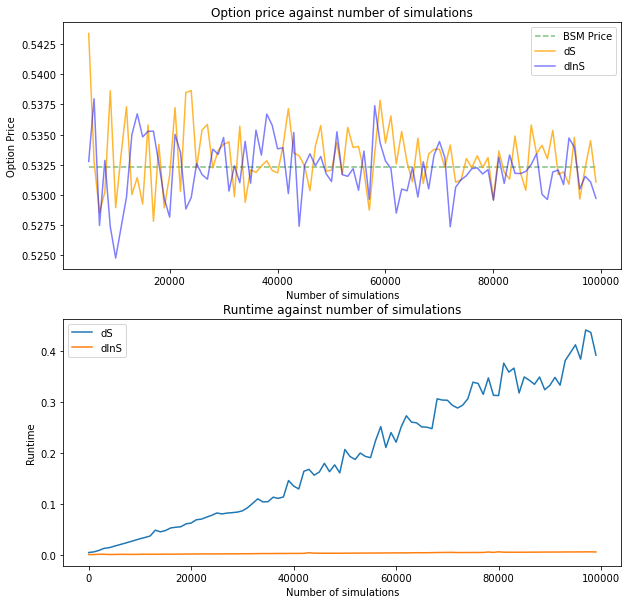

In [3122]:
fig, axs = plt.subplots(2, figsize=(10,10))


axs[0].plot(df_ds_comp.columns[5:], df_ds_comp.loc["BSM Price"].values[5:],'--',
               color = "green", alpha = 0.5, label = "BSM Price")

axs[0].plot(df_ds_comp.columns[5:], df_ds_comp.loc["Estimated Price"].values[5:],
               '-', color = "orange", alpha = 0.8, label = "dS")
axs[0].plot(df_dlns_comp.columns[5:], df_dlns_comp.loc["Estimated Price"].values[5:],
               '-', color = "blue", alpha = 0.5, label = "dlnS")
axs[0].set_title("Option price against number of simulations")
axs[0].legend()




axs[1].plot(df_ds_comp.columns, df_ds_comp.loc["Runtime"].values, label = "dS")
axs[1].plot(df_dlns_comp.columns, df_dlns_comp.loc["Runtime"].values, label = "dlnS")
axs[1].set_title("Runtime against number of simulations")
axs[1,].legend()



plt.setp(axs[:], xlabel='Number of simulations')
plt.setp(axs[0], ylabel='Option Price')

plt.setp(axs[1], ylabel='Runtime')

#plt.savefig('Image/dS Vs dlnS - one giant leap against multi timestep - Option Price and Runtime.png')

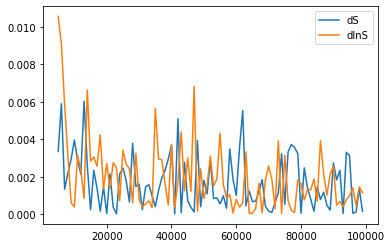

In [3159]:
plt.plot(df_ds.columns[5:], df_ds.loc["Absolute Error"].values[5:], label = "dS")
plt.plot(df_dlns.columns[5:], df_dlns.loc["Absolute Error"].values[5:], label = "dlnS")
plt.legend()

## Changing Parameters

### Changing Volatility

In [3007]:
df_vol = pd.DataFrame()
for i in np.linspace(0.1,1,10):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = i,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [float("{:.3}".format(i))] # formatting 3 significant figure
    df_vol = pd.concat([df_vol, df1], axis=1)
    
df_vol.columns.name = "Vol"   

df_vol.applymap(formatting)

In [3008]:
print(df_vol.applymap(formatting).to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
Vol &       0.1 &       0.2 &       0.3 &       0.4 &       0.5 &       0.6 &       0.7 &       0.8 &       0.9 &       1.0 \\
\midrule
BSM Price       &  0.640791 &  0.532325 &  0.481939 &  0.447180 &  0.418905 &  0.394032 &  0.371252 &  0.349929 &  0.329721 &  0.310439 \\
Estimated Price &  0.640948 &  0.532203 &  0.483063 &  0.446840 &  0.419473 &  0.392962 &  0.372159 &  0.348226 &  0.328650 &  0.310101 \\
Standard Error  &  0.001410 &  0.001493 &  0.001504 &  0.001501 &  0.001494 &  0.001481 &  0.001468 &  0.001449 &  0.001430 &  0.001410 \\
Relative Error  &  0.002200 &  0.002806 &  0.003113 &  0.003360 &  0.003560 &  0.003769 &  0.003945 &  0.004161 &  0.004352 &  0.004547 \\
Absolute Error  &  0.000157 &  0.000121 &  0.001124 &  0.000340 &  0.000569 &  0.001069 &  0.000907 &  0.001703 &  0.001072 &  0.000338 \\
Runtime         &  0.007729 &  0.013823 &  0.005809 &  0.005851 &  0.005747 &  0.005886 &  0.005768 &  0.006049 &  0.005925 &  0.00

In [3009]:
%%time
df_vol = pd.DataFrame()
for i in np.linspace(0.1,1,100):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = i,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [float("{:.3}".format(i))] # formatting 3 significant figure
    df_vol = pd.concat([df_vol, df1], axis=1)
    
df_vol.columns.name = "Vol"

Wall time: 828 ms


In [3010]:
np.where(df_vol.values== df_vol.loc["Standard Error"].max())

(array([2], dtype=int64), array([24], dtype=int64))

In [3011]:
df_vol.loc["Standard Error"].max()

0.0015040331792593455

In [3012]:
df_vol.iloc[[2],[24]]

Vol,0.318
Standard Error,0.00150403


Text(0.5, 1.0, 'Relative Error against volatility')

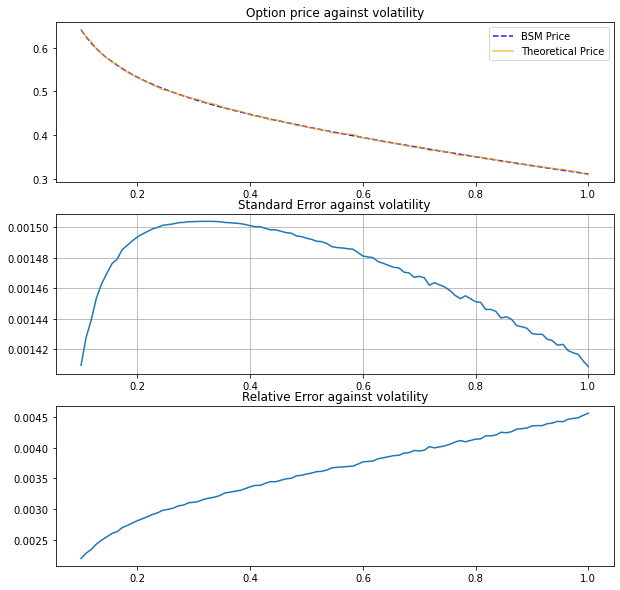

In [3013]:
fig, axs = plt.subplots(3, figsize=(10,10))
axs[0].plot(df_vol.columns, df_vol.loc["BSM Price"].values,'--',
               color = "blue", alpha = 0.9, label = "BSM Price")

axs[0].plot(df_vol.columns, df_vol.loc["Estimated Price"].values, '-',
               color = "orange", alpha = 0.7,label = "Theoretical Price" )


axs[0].set_title("Option price against volatility")
axs[0].legend()

axs[1].plot(df_vol.columns, df_vol.loc["Standard Error"].values)
axs[1].set_title("Standard Error against volatility")
axs[1].grid(True)

axs[2].plot(df_vol.columns, df_vol.loc["Relative Error"].values)
axs[2].set_title("Relative Error against volatility")

# plt.savefig('Image/Changing Vol.png')

### Changing Strike

In [3014]:
df_strike = pd.DataFrame()
for i in np.arange(50,200,25):

    mc = Monte_Carlo(stock = 100, strike = i, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] 
    df_strike = pd.concat([df_strike, df1], axis=1)
    
df_strike.columns.name = "Strike"   

In [3015]:
df_strike.applymap(formatting)

Strike,50,75,100,125,150,175
BSM Price,0.951087,0.897868,0.532325,0.158943,0.028762,0.003850
Estimated Price,0.951106,0.898332,0.531100,0.159711,0.028813,0.003596
Standard Error,0.000034,0.000689,0.001494,0.001124,0.000516,0.000185
Relative Error,0.000036,0.000767,0.002813,0.007040,0.017893,0.051337
Absolute Error,0.000019,0.000463,0.001225,0.000768,0.000051,0.000254
Runtime,0.008106,0.006204,0.006982,0.006182,0.006058,0.005866


In [3016]:
print(df_strike.applymap(formatting).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
Strike &       50  &       75  &       100 &       125 &       150 &       175 \\
\midrule
BSM Price       &  0.951087 &  0.897868 &  0.532325 &  0.158943 &  0.028762 &  0.003850 \\
Estimated Price &  0.951106 &  0.898332 &  0.531100 &  0.159711 &  0.028813 &  0.003596 \\
Standard Error  &  0.000034 &  0.000689 &  0.001494 &  0.001124 &  0.000516 &  0.000185 \\
Relative Error  &  0.000036 &  0.000767 &  0.002813 &  0.007040 &  0.017893 &  0.051337 \\
Absolute Error  &  0.000019 &  0.000463 &  0.001225 &  0.000768 &  0.000051 &  0.000254 \\
Runtime         &  0.008106 &  0.006204 &  0.006982 &  0.006182 &  0.006058 &  0.005866 \\
\bottomrule
\end{tabular}



In [3017]:
%%time
df_strike = pd.DataFrame()
for i in np.arange(30,200,1):

    mc = Monte_Carlo(stock = 100, strike = i, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] 
    df_strike = pd.concat([df_strike, df1], axis=1)
    
df_strike.columns.name = "Strike"   

Wall time: 1.44 s


Text(0.5, 1.0, 'Relative Error against Strike')

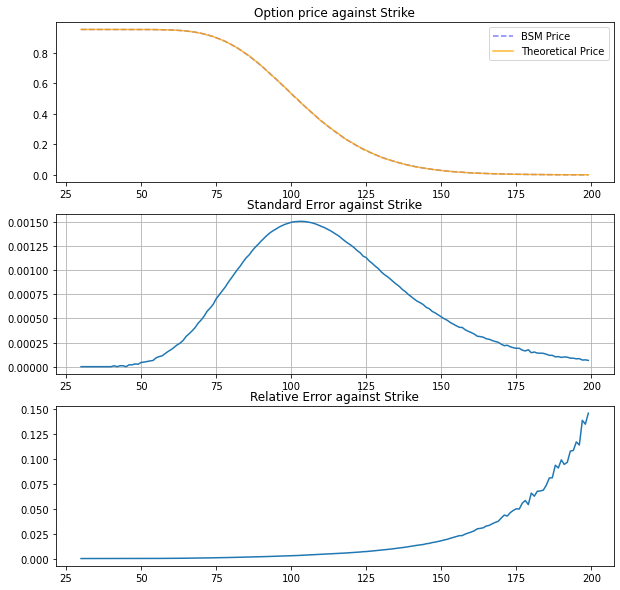

In [3018]:
fig, axs = plt.subplots(3, figsize=(10,10))
axs[0].plot(df_strike.columns, df_strike.loc["BSM Price"].values,'--',
            color = "blue", alpha = 0.5, label = "BSM Price")
axs[0].plot(df_strike.columns, df_strike.loc["Estimated Price"].values, '-',
            color = "orange", alpha = 0.8, label = "Theoretical Price")
axs[0].set_title("Option price against " + df_strike.columns.name)
axs[0].legend()

axs[1].plot(df_strike.columns, df_strike.loc["Standard Error"].values)
axs[1].set_title("Standard Error against " + df_strike.columns.name)
axs[1].grid(True)

axs[2].plot(df_strike.columns, df_strike.loc["Relative Error"].values)
axs[2].set_title("Relative Error against " + df_strike.columns.name)


### Changing initial Asset Price $S_0$

In [3019]:
df_s0 = pd.DataFrame()
for i in np.arange(50,200,25):

    mc = Monte_Carlo(stock = i, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] 
    df_s0 = pd.concat([df_s0, df1], axis=1)
    
df_s0.columns.name = "$S_0$"   

In [3020]:
df_s0.applymap(formatting)

$S_0$,50,75,100,125,150,175
BSM Price,0.000435,0.093983,0.532325,0.853436,0.937220,0.949709
Estimated Price,0.000419,0.093411,0.530263,0.853519,0.936685,0.949736
Standard Error,0.000063,0.000895,0.001494,0.000913,0.000369,0.000119
Relative Error,0.150723,0.009583,0.002818,0.001070,0.000394,0.000125
Absolute Error,0.000016,0.000572,0.002062,0.000083,0.000534,0.000027
Runtime,0.008121,0.006997,0.006084,0.005958,0.006023,0.005794


In [3021]:
print(df_s0.applymap(formatting).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
\$S\_0\$ &       50  &       75  &       100 &       125 &       150 &       175 \\
\midrule
BSM Price       &  0.000435 &  0.093983 &  0.532325 &  0.853436 &  0.937220 &  0.949709 \\
Estimated Price &  0.000419 &  0.093411 &  0.530263 &  0.853519 &  0.936685 &  0.949736 \\
Standard Error  &  0.000063 &  0.000895 &  0.001494 &  0.000913 &  0.000369 &  0.000119 \\
Relative Error  &  0.150723 &  0.009583 &  0.002818 &  0.001070 &  0.000394 &  0.000125 \\
Absolute Error  &  0.000016 &  0.000572 &  0.002062 &  0.000083 &  0.000534 &  0.000027 \\
Runtime         &  0.008121 &  0.006997 &  0.006084 &  0.005958 &  0.006023 &  0.005794 \\
\bottomrule
\end{tabular}



In [3022]:
%%time
df_s0 = pd.DataFrame()
for i in np.arange(50,200,1):

    mc = Monte_Carlo(stock = i, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] 
    df_s0 = pd.concat([df_s0, df1], axis=1)
    
df_s0.columns.name = "$S_0$"   

Wall time: 1.26 s


Text(0.5, 1.0, '$S_0$ vs Runtime')

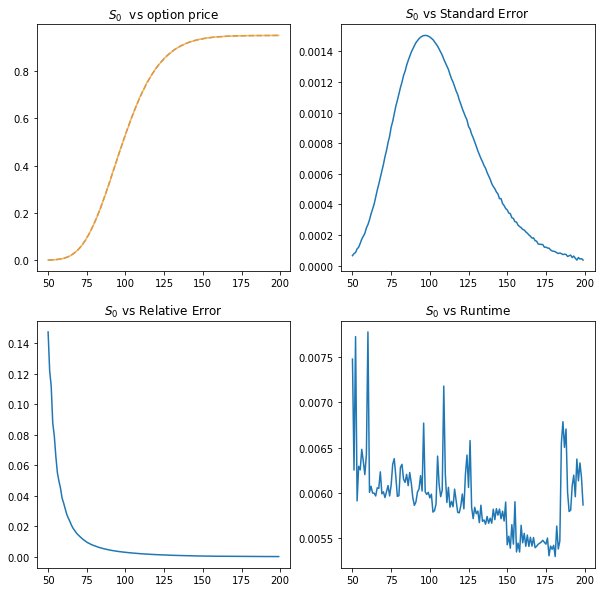

In [3023]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].plot(df_s0.columns, df_s0.loc["BSM Price"].values,'--', color = "blue", alpha = 0.5)
axs[0, 0].plot(df_s0.columns, df_s0.loc["Estimated Price"].values, '-', color = "orange", alpha = 0.8)
axs[0, 0].set_title("$S_0$  vs option price")


axs[0, 1].plot(df_s0.columns, df_s0.loc["Standard Error"].values)
axs[0, 1].set_title("$S_0$ vs Standard Error")

axs[1, 0].plot(df_s0.columns, df_s0.loc["Relative Error"].values)
axs[1, 0].set_title("$S_0$ vs Relative Error")

axs[1, 1].plot(df_s0.columns, df_s0.loc["Runtime"].values)
axs[1, 1].set_title("$S_0$ vs Runtime")


### Changing time to maturity "$\tau$"

In [3024]:
%%time
df_tau = pd.DataFrame()
for i in np.arange(0.2,2.1,0.2):

    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=i,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] 
    df_tau = pd.concat([df_tau, df1], axis=1)
    
df_tau.columns.name = "Tau"   

Wall time: 94.8 ms


In [3025]:
df_tau.applymap(formatting)

Tau,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0
BSM Price,0.521501,0.527141,0.530105,0.531666,0.532325,0.532341,0.531870,0.531015,0.529849,0.528423
Estimated Price,0.522845,0.528337,0.532503,0.533056,0.532546,0.532332,0.533413,0.532315,0.529605,0.530307
Standard Error,0.001563,0.001545,0.001527,0.001510,0.001493,0.001476,0.001459,0.001442,0.001427,0.001409
Relative Error,0.002989,0.002924,0.002868,0.002833,0.002804,0.002773,0.002735,0.002710,0.002694,0.002658
Absolute Error,0.001345,0.001196,0.002398,0.001390,0.000221,0.000009,0.001543,0.001300,0.000244,0.001884
Runtime,0.008573,0.012730,0.006117,0.006424,0.005876,0.005906,0.005869,0.005885,0.005965,0.005763


In [3026]:
%%time
df_tau = pd.DataFrame()
for i in np.arange(0.1,2.01,0.01):

    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=i,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] 
    df1.loc["CI_lower"] = df1.loc["Estimated Price"].values - norm_inv(0.05) * df1.loc["Standard Error"].values
    df1.loc["CI_upper"] = df1.loc["Estimated Price"].values + norm_inv(0.05) * df1.loc["Standard Error"].values
    df_tau = pd.concat([df_tau, df1], axis=1)
    
df_tau.columns.name = "Tau"   

Wall time: 2.12 s


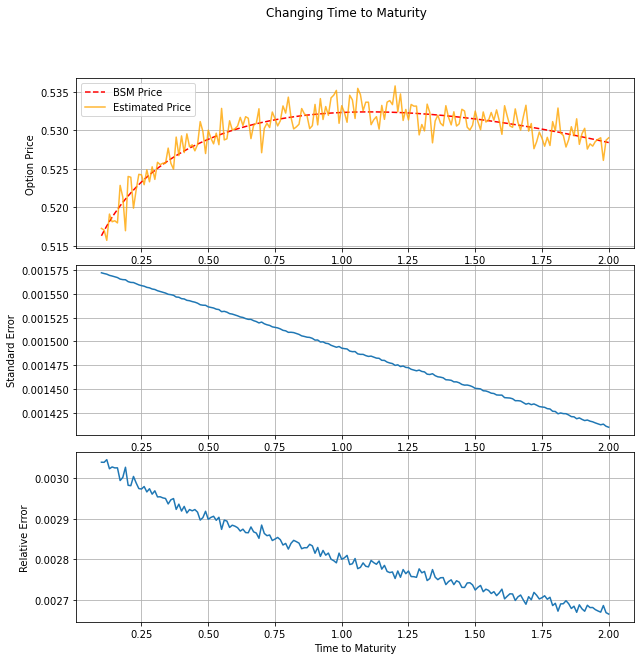

In [3027]:
fig = plt.figure(figsize=(10,10))
gs = gs = fig.add_gridspec(3, hspace=0.1)
#axs = plt.subplots((3,  hspace = 0), sharex=True)
axs=gs.subplots(sharex=False, sharey=False)
fig.suptitle('Changing Time to Maturity')



axs[0].plot(df_tau.columns, df_tau.loc["BSM Price"].values,'--', color = "red", alpha = 1, label = "BSM Price")
axs[0].plot(df_tau.columns, df_tau.loc["Estimated Price"].values, '-', color = "orange", alpha = 0.8, label = "Estimated Price")
#axs[0].set_title(df_tau.columns.name + " against option price")

#axs[0].plot(df_tau.columns, df_tau.loc["CI_lower"].values, '--', color = "purple", alpha = 0.4, label = "Upper Confidence Interval")
#axs[0].plot(df_tau.columns, df_tau.loc["CI_upper"].values, '--', color = "blue", alpha = 0.4, label = "Lower Confidence Interval")
axs[0].legend()


axs[1].plot(df_tau.columns, df_tau.loc["Standard Error"].values)
#axs[1].set_title(df_tau.columns.name + " vs Standard Error")

axs[2].plot(df_tau.columns, df_tau.loc["Relative Error"].values)
#axs[2].set_title(df_tau.columns.name + " vs Relative Error")

plt.setp(axs[2], xlabel='Time to Maturity')
plt.setp(axs[0], ylabel='Option Price')
plt.setp(axs[1], ylabel='Standard Error')
plt.setp(axs[2], ylabel='Relative Error')
for ax in axs:
    ax.grid(True)
    
    
#plt.savefig('Image/Changing Tau.png')

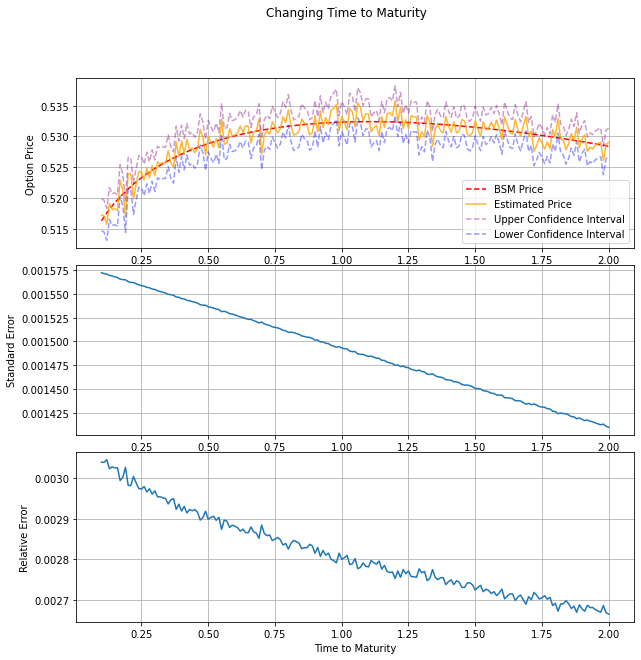

In [3028]:
#Plot with confidence interval.

fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(3, hspace=0.1)
#axs = plt.subplots((3,  hspace = 0), sharex=True)
axs=gs.subplots(sharex=False, sharey=False)
fig.suptitle('Changing Time to Maturity')



axs[0].plot(df_tau.columns, df_tau.loc["BSM Price"].values,'--', color = "red", alpha = 1, label = "BSM Price")
axs[0].plot(df_tau.columns, df_tau.loc["Estimated Price"].values, '-', color = "orange", alpha = 0.8, label = "Estimated Price")
#axs[0].set_title(df_tau.columns.name + " against option price")

axs[0].plot(df_tau.columns, df_tau.loc["CI_lower"].values, '--', color = "purple", alpha = 0.4, label = "Upper Confidence Interval")
axs[0].plot(df_tau.columns, df_tau.loc["CI_upper"].values, '--', color = "blue", alpha = 0.4, label = "Lower Confidence Interval")
axs[0].legend()
axs[1].plot(df_tau.columns, df_tau.loc["Standard Error"].values)
#axs[1].set_title(df_tau.columns.name + " vs Standard Error")

axs[2].plot(df_tau.columns, df_tau.loc["Relative Error"].values)
#axs[2].set_title(df_tau.columns.name + " vs Relative Error")

plt.setp(axs[2], xlabel='Time to Maturity')
plt.setp(axs[0], ylabel='Option Price')
plt.setp(axs[1], ylabel='Standard Error')
plt.setp(axs[2], ylabel='Relative Error')
for ax in axs:
    ax.grid(True)

(0.4, 0.6)

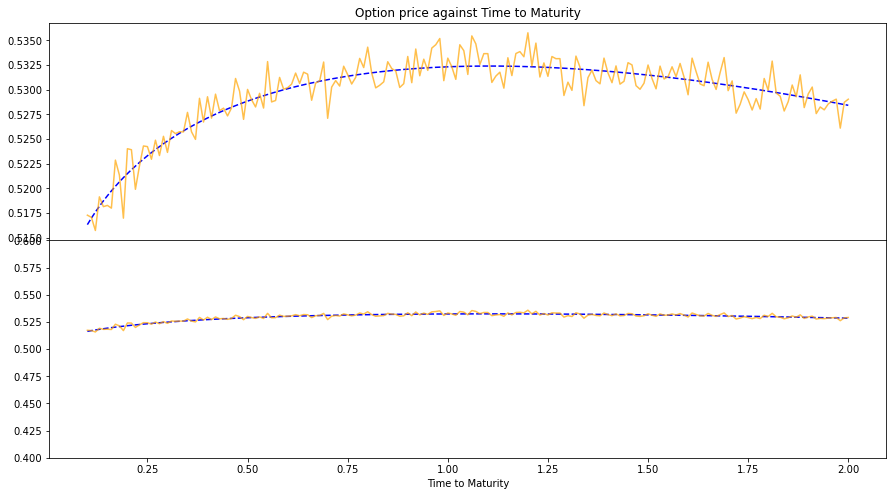

In [3029]:
# Checking Scaling of the y-axis
# The range is less smaller compare to other variable hence, each choc
# is more visible

fig = plt.figure(figsize=(15, 8))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)
#fig, axs = plt.subplots(2,1, figsize=(15, 8), sharex=True, sharey=False, hspace=0)


axs[0].plot(df_tau.columns, df_tau.loc["BSM Price"].values,'--', 
              color = "blue", alpha = 1, label = "BSM Price")
axs[0].plot(df_tau.columns, df_tau.loc["Estimated Price"].values, '-',
              color = "orange", alpha = 0.7,label = "Estimated Price")
axs[0].set_title("Option price against Time to Maturity")
#axs[0].plot(df_tau.columns, df_tau.loc["CI_lower"].values, '--', color = "purple", alpha = 0.4, label = "Upper Confidence Interval")
#axs[0].plot(df_tau.columns, df_tau.loc["CI_upper"].values, '--', color = "blue", alpha = 0.4, label = "Lower Confidence Interval")
#axs[0,1].legend()
plt.setp(axs[1], xlabel='Time to Maturity')

axs[1].plot(df_tau.columns, df_tau.loc["BSM Price"].values,'--', 
              color = "blue", alpha = 1, label = "BSM Price")
axs[1].plot(df_tau.columns, df_tau.loc["Estimated Price"].values, '-',
              color = "orange", alpha = 0.7,label = "Estimated Price")
axs[1].set_ylim([0.4,0.6])
#axs[0].plot(df_tau.columns, df_tau.loc["CI_lower"].values, '--', color = "purple", alpha = 0.4, label = "Upper Confidence Interval")
#axs[0].plot(df_tau.columns, df_tau.loc["CI_upper"].values, '--', color = "blue", alpha = 0.4, label = "Lower Confidence Interval")
#axs[0,1].legend()


### Changing Dividend yield

In [3030]:
%%time
df_div = pd.DataFrame()
for i in np.linspace(0.0,0.5,6):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= i, vol = 0.2,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [float("{:.3}".format(i))] # formatting 3 significant figure
    df_div = pd.concat([df_div, df1], axis=1)
    
df_div.columns.name = "Dividend"   

Wall time: 54.8 ms


In [3031]:
df_div.applymap(formatting)

Dividend,0.0,0.1,0.2,0.3,0.4,0.5
BSM Price,0.532325,0.345457,0.188022,0.084191,0.030588,0.008929
Estimated Price,0.533478,0.346485,0.186470,0.085021,0.031238,0.008713
Standard Error,0.001493,0.001448,0.001194,0.000858,0.000536,0.000287
Relative Error,0.002798,0.004178,0.006404,0.010094,0.017161,0.032889
Absolute Error,0.001153,0.001028,0.001553,0.000829,0.000650,0.000216
Runtime,0.008348,0.006214,0.006129,0.006223,0.006018,0.006256


In [3032]:
np.linspace(0.1,0.5,51)

array([0.1  , 0.108, 0.116, 0.124, 0.132, 0.14 , 0.148, 0.156, 0.164,
       0.172, 0.18 , 0.188, 0.196, 0.204, 0.212, 0.22 , 0.228, 0.236,
       0.244, 0.252, 0.26 , 0.268, 0.276, 0.284, 0.292, 0.3  , 0.308,
       0.316, 0.324, 0.332, 0.34 , 0.348, 0.356, 0.364, 0.372, 0.38 ,
       0.388, 0.396, 0.404, 0.412, 0.42 , 0.428, 0.436, 0.444, 0.452,
       0.46 , 0.468, 0.476, 0.484, 0.492, 0.5  ])

In [3033]:
%%time
df_div = pd.DataFrame()
for i in np.linspace(0.,0.5,51):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= i, vol = 0.2,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [float("{:.3}".format(i))] # formatting 3 significant figure
    df_div = pd.concat([df_div, df1], axis=1)
    
df_div.columns.name = "Dividend"   

Wall time: 445 ms


[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]


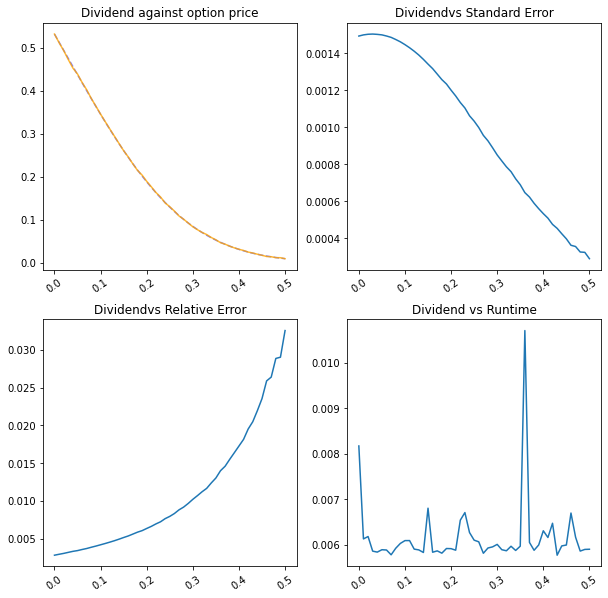

In [3034]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].plot(df_div.columns, df_div.loc["BSM Price"].values,'--', color = "blue", alpha = 0.5)
axs[0, 0].plot(df_div.columns, df_div.loc["Estimated Price"].values, '-', color = "orange", alpha = 0.8)
axs[0, 0].set_title(df_div.columns.name + " against option price")
axs[0,0].tick_params(axis ='x', rotation= 35)

axs[0, 1].plot(df_div.columns, df_div.loc["Standard Error"].values)
axs[0, 1].set_title(df_div.columns.name + "vs Standard Error")
axs[0,1].tick_params(axis ='x', rotation= 35)

axs[1, 0].plot(df_div.columns, df_div.loc["Relative Error"].values)
axs[1, 0].set_title(df_div.columns.name + "vs Relative Error")
axs[1,0].tick_params(axis ='x', rotation= 35)

axs[1, 1].plot(df_div.columns, df_div.loc["Runtime"].values)
axs[1, 1].set_title(df_div.columns.name + " vs Runtime")
axs[1,1].tick_params(axis ='x', rotation= 35)
#plt.setp

print(axs[0,0].xaxis.get_ticklabels())
#axs[1,0].set_xticks([0,0.5,1])

### Changing Interest rate 

In [3037]:
%%time
df_rate = pd.DataFrame()
for i in np.linspace(0.00,0.20,11):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= i, dividend= 0, vol = 0.2,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [float("{:.3}".format(i))] # formatting 3 significant figure
    df_rate = pd.concat([df_rate, df1], axis=1)
    
df_rate.columns.name = "Rate"   

Wall time: 93.8 ms


In [3038]:
df_rate.applymap(formatting)

Rate,0.00,0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20
BSM Price,0.460172,0.490099,0.518661,0.545526,0.570404,0.593050,0.613272,0.630934,0.645956,0.658314,0.668035
Estimated Price,0.460590,0.493599,0.518327,0.546506,0.569175,0.592316,0.613217,0.632562,0.645175,0.657391,0.666619
Standard Error,0.001576,0.001550,0.001514,0.001470,0.001419,0.001361,0.001296,0.001224,0.001156,0.001081,0.001007
Relative Error,0.003422,0.003140,0.002922,0.002689,0.002494,0.002297,0.002113,0.001935,0.001791,0.001645,0.001511
Absolute Error,0.000418,0.003499,0.000334,0.000980,0.001229,0.000734,0.000055,0.001628,0.000781,0.000923,0.001416
Runtime,0.007801,0.006131,0.005993,0.005858,0.005776,0.005824,0.005761,0.005855,0.005694,0.005869,0.005799


In [3040]:
%%time
df_rate = pd.DataFrame()
for i in np.arange(0.00,0.5,0.005):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= i, dividend= 0, vol = 0.2,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [float("{:.3}".format(i))] # formatting 3 significant figure
    df_rate = pd.concat([df_rate, df1], axis=1)
    
df_rate.columns.name = "Rate"   

Wall time: 872 ms


In [3041]:
df_rate.applymap(formatting)

Rate,0.000,0.005,0.010,0.015,0.020,0.025,0.030,0.035,0.040,0.045,...,0.450,0.455,0.460,0.465,0.470,0.475,0.480,0.485,0.490,0.495
BSM Price,0.460172,0.467763,0.475284,0.482732,0.490099,0.497381,0.504572,0.511667,0.518661,0.525548,...,0.627568,0.625049,0.622507,0.619944,0.617362,0.614763,0.612147,0.609518,0.606876,0.604222
Estimated Price,0.460130,0.469178,0.475264,0.482488,0.490266,0.496842,0.504496,0.510574,0.518346,0.525799,...,0.627885,0.624957,0.622591,0.619976,0.617327,0.614721,0.612255,0.609737,0.606843,0.604066
Standard Error,0.001576,0.001571,0.001564,0.001557,0.001550,0.001542,0.001533,0.001524,0.001514,0.001504,...,0.000247,0.000244,0.000233,0.000225,0.000218,0.000210,0.000200,0.000191,0.000187,0.000182
Relative Error,0.003425,0.003348,0.003291,0.003228,0.003161,0.003103,0.003039,0.002985,0.002922,0.002860,...,0.000394,0.000390,0.000374,0.000363,0.000353,0.000341,0.000327,0.000313,0.000309,0.000302
Absolute Error,0.000042,0.001416,0.000021,0.000244,0.000167,0.000539,0.000076,0.001094,0.000315,0.000250,...,0.000317,0.000092,0.000084,0.000032,0.000035,0.000042,0.000108,0.000219,0.000033,0.000156
Runtime,0.007821,0.006152,0.006070,0.006108,0.006075,0.005925,0.006147,0.006214,0.006157,0.006081,...,0.005280,0.005487,0.005340,0.005344,0.005297,0.005327,0.005382,0.005398,0.006922,0.006563


Text(0.5, 1.0, 'Rate vs Runtime')

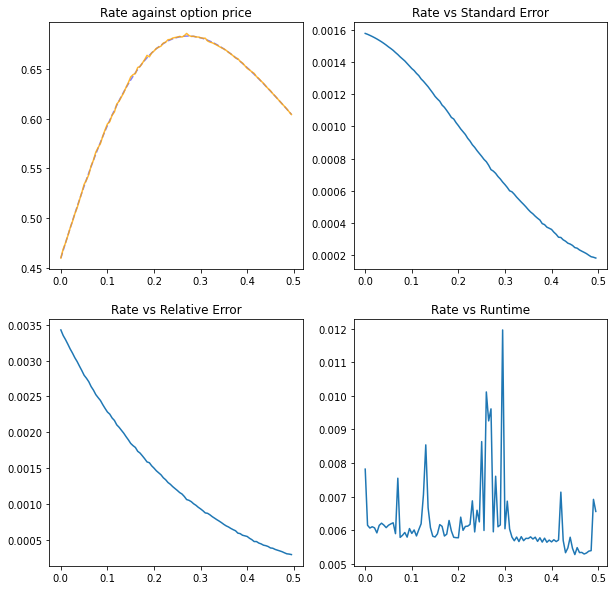

In [3042]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].plot(df_rate.columns, df_rate.loc["BSM Price"].values,'--', color = "blue", alpha = 0.5)
axs[0, 0].plot(df_rate.columns, df_rate.loc["Estimated Price"].values, '-', color = "orange", alpha = 0.8)
axs[0, 0].set_title(df_rate.columns.name + " against option price")


axs[0, 1].plot(df_rate.columns, df_rate.loc["Standard Error"].values)
axs[0, 1].set_title(df_rate.columns.name + " vs Standard Error")

axs[1, 0].plot(df_rate.columns, df_rate.loc["Relative Error"].values)
axs[1, 0].set_title(df_rate.columns.name + " vs Relative Error")

axs[1, 1].plot(df_rate.columns, df_rate.loc["Runtime"].values)
axs[1, 1].set_title(df_rate.columns.name + " vs Runtime")


#axs.xaxis.set_major_locator(ticker.MultipleLocator(1))
#axs[0,0].xticks(np.arange(0, len(np.linspace(0.00,0.20,101))+1, 5))

### Changing timestep size $\Delta t$

As we are increasing the number of timestep, the time step $\Delta t$ is reducing (for a fixed time horizon, in our case T = 1 year)

In [3043]:
temp_list = list(np.arange(1,100+1,10))
temp_list.insert(0,1)

In [3044]:
temp_list

[1, 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]

In [2610]:
%%time
df_dt = pd.DataFrame()
for i in np.arange(1,100+2,10):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= i, simulations= 10**5,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] 
    df_dt = pd.concat([df_dt, df1], axis=1)
    
df_dt.columns.name = "Timestep"   

Wall time: 3.76 s


In [2611]:
df_dt.applymap(formatting)

Timestep,1,11,21,31,41,51,61,71,81,91,101
BSM Price,0.532325,0.532325,0.532325,0.532325,0.532325,0.532325,0.532325,0.532325,0.532325,0.532325,0.532325
Estimated Price,0.533193,0.530976,0.534058,0.532080,0.531975,0.530929,0.532165,0.530472,0.532479,0.531014,0.533221
Standard Error,0.001493,0.001494,0.001493,0.001493,0.001493,0.001494,0.001493,0.001494,0.001493,0.001494,0.001493
Relative Error,0.002800,0.002813,0.002795,0.002807,0.002807,0.002814,0.002806,0.002816,0.002804,0.002813,0.002800
Absolute Error,0.000868,0.001349,0.001733,0.000245,0.000350,0.001396,0.000160,0.001853,0.000154,0.001311,0.000896
Runtime,0.007971,0.070335,0.136929,0.220964,0.264725,0.345067,0.403822,0.461270,0.513511,0.580524,0.699904


In [ ]:
np.arange(1,100+1,10)

In [2613]:
%%time
df_dt = pd.DataFrame()
for i in np.arange(1,100+2,5):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= i, simulations= 10**5,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] 
    df_dt = pd.concat([df_dt, df1], axis=1)
    
df_dt.columns.name = "Timestep"   

Wall time: 7.4 s


Text(0.5, 1.0, 'Timestep vs Runtime')

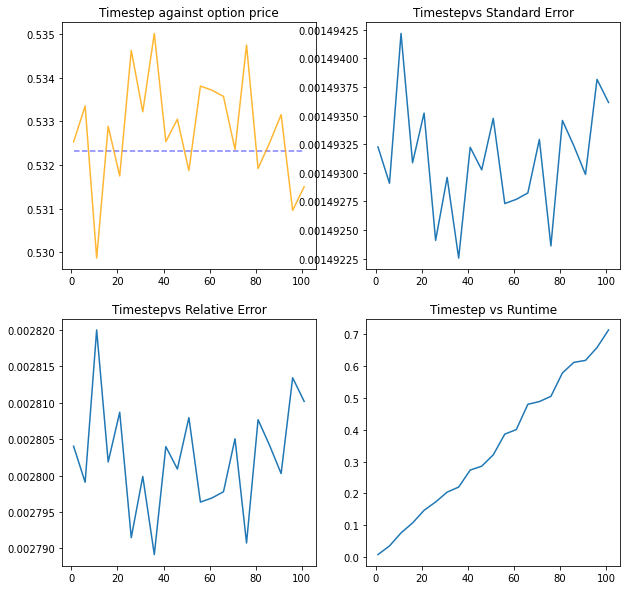

In [2615]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].plot(df_dt.columns, df_dt.loc["BSM Price"].values,'--', color = "blue", alpha = 0.5)
axs[0, 0].plot(df_dt.columns, df_dt.loc["Estimated Price"].values, '-', color = "orange", alpha = 0.8)
axs[0, 0].set_title(df_dt.columns.name + " against option price")


axs[0, 1].plot(df_dt.columns, df_dt.loc["Standard Error"].values)
axs[0, 1].set_title(df_dt.columns.name + "vs Standard Error")

axs[1, 0].plot(df_dt.columns, df_dt.loc["Relative Error"].values)
axs[1, 0].set_title(df_dt.columns.name + "vs Relative Error")

axs[1, 1].plot(df_dt.columns, df_dt.loc["Runtime"].values)
axs[1, 1].set_title(df_dt.columns.name + " vs Runtime")


### Changing number of simulations

In [3049]:
df_simulations = pd.DataFrame()
for i in [2,10**1,10**2,10**3,10**4,10**5]:
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= i,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] 
    df_simulations = pd.concat([df_simulations, df1], axis=1)
    
df_simulations.columns.name = "Simulations"   

In [3050]:
df_simulations.applymap(formatting)

Simulations,2,10,100,1000,10000,100000
BSM Price,0.532325,0.532325,0.532325,0.532325,0.532325,0.532325
Estimated Price,0.951229,0.570738,0.532689,0.530786,0.544484,0.530881
Standard Error,0.000000,0.155335,0.047456,0.014946,0.004706,0.001494
Relative Error,0.000000,0.272166,0.089087,0.028159,0.008644,0.002814
Absolute Error,0.418905,0.038413,0.000364,0.001539,0.012159,0.001444
Runtime,0.000189,0.000140,0.000417,0.000742,0.000913,0.008148


In [3051]:
temp_list = list(np.arange(1000,100000+1,1000))
temp_list.insert(0,10)

In [3052]:
%%time
df_simulations = pd.DataFrame()
for i in temp_list:
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= i,
                method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] 
    df_simulations = pd.concat([df_simulations, df1], axis=1)
    
df_simulations.columns.name = "Simulations"   

Wall time: 531 ms


[Text(0, 0.5, 'Runtime')]

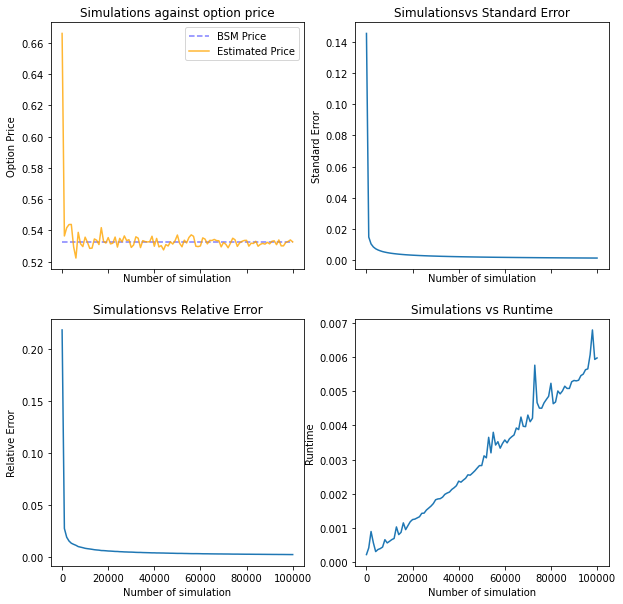

In [3054]:
fig, axs = plt.subplots(2, 2, figsize=(10,10), sharex=(True))
axs[0, 0].plot(df_simulations.columns, df_simulations.loc["BSM Price"].values,'--', color = "blue", alpha = 0.5, label = "BSM Price")
axs[0, 0].plot(df_simulations.columns, df_simulations.loc["Estimated Price"].values, '-', color = "orange", alpha = 0.8, label= "Estimated Price")
axs[0,0].legend()
axs[0, 0].set_title(df_simulations.columns.name + " against option price")


axs[0, 1].plot(df_simulations.columns, df_simulations.loc["Standard Error"].values)
axs[0, 1].set_title(df_simulations.columns.name + "vs Standard Error")

axs[1, 0].plot(df_simulations.columns, df_simulations.loc["Relative Error"].values)
axs[1, 0].set_title(df_simulations.columns.name + "vs Relative Error")

axs[1, 1].plot(df_simulations.columns, df_simulations.loc["Runtime"].values)
axs[1, 1].set_title(df_simulations.columns.name + " vs Runtime")


plt.setp(axs[:, :], xlabel='Number of simulation')

plt.setp(axs[0, 0], ylabel='Option Price')
plt.setp(axs[0, 1], ylabel='Standard Error')
plt.setp(axs[1, 0], ylabel='Relative Error')
plt.setp(axs[1, 1], ylabel='Runtime')

#plt.savefig('Image/Changing Number of Simulations.png')

[Text(0, 0.5, 'Runtime')]

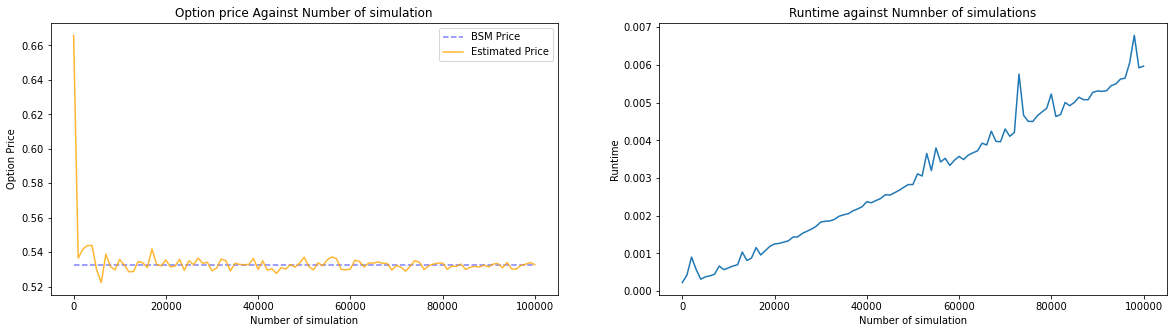

In [3055]:
fig, axs = plt.subplots(1,2,figsize=(20,5), sharex=(True))

axs[0].plot(df_simulations.columns, df_simulations.loc["BSM Price"].values,'--', color = "blue", alpha = 0.5, label = "BSM Price")
axs[0].plot(df_simulations.columns, df_simulations.loc["Estimated Price"].values, '-', color = "orange", alpha = 0.8, label= "Estimated Price")
axs[0].legend()
axs[0].set_title("Option price Against Number of simulation")

axs[1].plot(df_simulations.columns, df_simulations.loc["Runtime"].values)
axs[1].set_title("Runtime against Numnber of simulations")


plt.setp(axs[:], xlabel='Number of simulation')

plt.setp(axs[0], ylabel='Option Price')
plt.setp(axs[1], ylabel='Runtime')

#plt.savefig('Image/Changing Number of Simulations - Option Price and Runtime.png')

[Text(0, 0.5, 'Relative Error')]

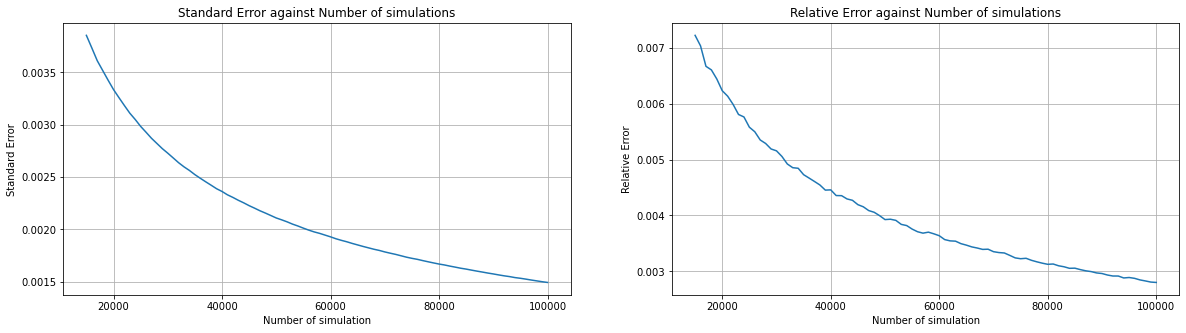

In [3056]:
fig, axs = plt.subplots(1,2,figsize=(20,5), sharex=(True))



axs[0].plot(df_simulations.columns[15:], df_simulations.loc["Standard Error"][15:].values)
axs[0].set_title("Standard Error against Number of simulations")
axs[0].grid()

axs[1].plot(df_simulations.columns[15:], df_simulations.loc["Relative Error"][15:].values)
axs[1].set_title("Relative Error against Number of simulations")
axs[1].grid()

plt.setp(axs[:], xlabel='Number of simulation')

plt.setp(axs[0], ylabel='Standard Error')
plt.setp(axs[1], ylabel='Relative Error')

#plt.savefig('Image/Changing Number of Simulations - Compare Error.png')

In [3057]:
INDEX = pd.MultiIndex.from_product([["BSM Price", "Estimated Price", "Standard Error", "Relative Error", "Absolute Error", "Runtime"]])
COLUMNS = pd.MultiIndex.from_product([[10**4,4* 10**4, 4*4*10**4], [90,100,110]],names = ["Simulation", "Strike"])

data = None
# create the DataFrame
df_sim = pd.DataFrame(data, index=INDEX, columns=COLUMNS)
df_sim

Simulation      10000            40000            160000          
Strike             90   100  110    90   100  110    90   100  110
BSM Price          NaN  NaN  NaN    NaN  NaN  NaN    NaN  NaN  NaN
Estimated Price    NaN  NaN  NaN    NaN  NaN  NaN    NaN  NaN  NaN
Standard Error     NaN  NaN  NaN    NaN  NaN  NaN    NaN  NaN  NaN
Relative Error     NaN  NaN  NaN    NaN  NaN  NaN    NaN  NaN  NaN
Absolute Error     NaN  NaN  NaN    NaN  NaN  NaN    NaN  NaN  NaN
Runtime            NaN  NaN  NaN    NaN  NaN  NaN    NaN  NaN  NaN

In [3058]:
df_sim.columns

MultiIndex([( 10000,  90),
            ( 10000, 100),
            ( 10000, 110),
            ( 40000,  90),
            ( 40000, 100),
            ( 40000, 110),
            (160000,  90),
            (160000, 100),
            (160000, 110)],
           names=['Simulation', 'Strike'])

In [3059]:
for i in df_sim.columns: # i is a tuple (a,b), i.e. (Simulation, Strike)
    mc = Monte_Carlo(stock = 100, strike = i[1], t=0, T=1, rate= 0.05, dividend= 0, vol = 0.2, timestep= 10**0,
                     simulations= i[0], method = "dlnS", cash_f = "cash", flag = "call", antithetic = False)
    df_temp = mc.mc_process()
    df_sim.xs(i, axis =1).loc["BSM Price"] = df_temp.loc["BSM Price"].values
    df_sim.xs(i, axis =1).loc["Estimated Price"] =df_temp.loc["Estimated Price"].values
    df_sim.xs(i, axis =1).loc["Standard Error"] = df_temp.loc["Standard Error"].values
    df_sim.xs(i, axis =1).loc["Relative Error"] = df_temp.loc["Relative Error"].values
    df_sim.xs(i, axis =1).loc["Absolute Error"] = df_temp.loc["Absolute Error"].values
    df_sim.xs(i, axis =1).loc["Runtime"] = df_temp.loc["Runtime"].values


In [3060]:
print(df_sim.applymap(formatting).to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
Simulation & \multicolumn{3}{l}{10000} & \multicolumn{3}{l}{40000} & \multicolumn{3}{l}{160000} \\
Strike &       90  &       100 &       110 &       90  &       100 &       110 &       90  &       100 &       110 \\
\midrule
BSM Price &  0.714121 &  0.532325 &  0.353861 &  0.714121 &  0.532325 &  0.353861 &  0.714121 &  0.532325 &  0.353861 \\
Estimated Price &  0.714944 &  0.535352 &  0.355284 &  0.714064 &  0.529454 &  0.353191 &  0.713065 &  0.531386 &  0.354446 \\
Standard Error &  0.004110 &  0.004719 &  0.004602 &  0.002058 &  0.002363 &  0.002298 &  0.001030 &  0.001181 &  0.001150 \\
Relative Error &  0.005749 &  0.008814 &  0.012952 &  0.002882 &  0.004463 &  0.006506 &  0.001445 &  0.002222 &  0.003244 \\
Absolute Error &  0.000823 &  0.003027 &  0.001423 &  0.000056 &  0.002871 &  0.000669 &  0.001055 &  0.000938 &  0.000585 \\
Runtime &  0.002007 &  0.000983 &  0.000645 &  0.002342 &  0.002455 &  0.002218 &  0.011126 &  0.010518 &  0.01

In [3061]:
df_sim.applymap(formatting)

Simulation         10000                         40000                       \
Strike                90        100       110       90        100       110   
BSM Price        0.714121  0.532325  0.353861  0.714121  0.532325  0.353861   
Estimated Price  0.714944  0.535352  0.355284  0.714064  0.529454  0.353191   
Standard Error   0.004110  0.004719  0.004602  0.002058  0.002363  0.002298   
Relative Error   0.005749  0.008814  0.012952  0.002882  0.004463  0.006506   
Absolute Error   0.000823  0.003027  0.001423  0.000056  0.002871  0.000669   
Runtime          0.002007  0.000983  0.000645  0.002342  0.002455  0.002218   

Simulation         160000                      
Strike                90        100       110  
BSM Price        0.714121  0.532325  0.353861  
Estimated Price  0.713065  0.531386  0.354446  
Standard Error   0.001030  0.001181  0.001150  
Relative Error   0.001445  0.002222  0.003244  
Absolute Error   0.001055  0.000938  0.000585  
Runtime          0.011126  0.010518  0.011345

### Summary

In [2658]:
ax.get_legend_handles_labels()

([], [])

In [2701]:
#### Option Price

([<matplotlib.lines.Line2D object at 0x000001CD2DBEC6A0>, <matplotlib.lines.Line2D object at 0x000001CD2DBEC9D0>], ['BSM Price', 'Estimated Price'])


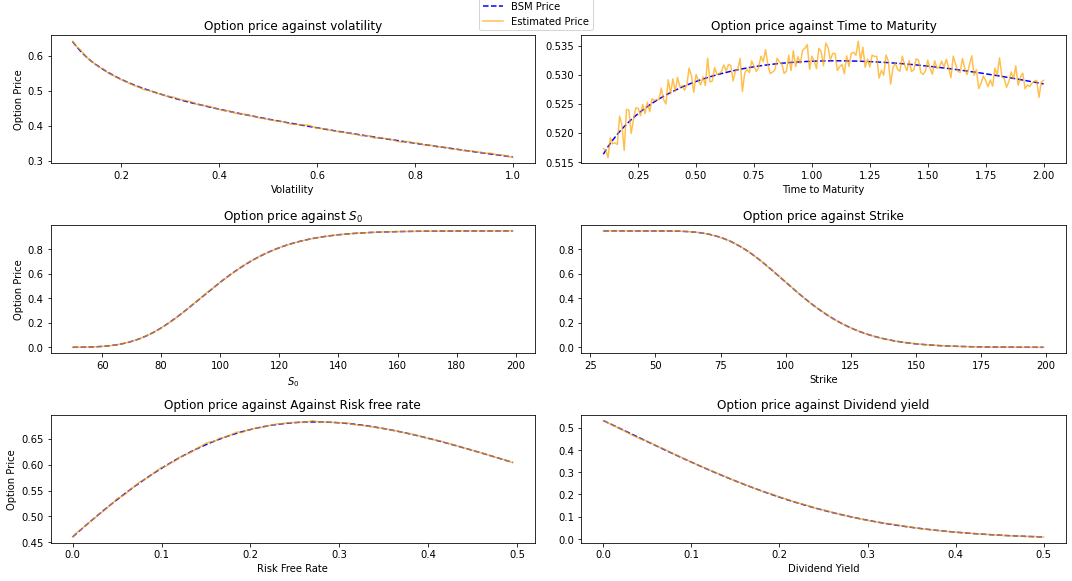

In [3063]:
fig, axs = plt.subplots(3,2, figsize=(15, 8), sharex=False, sharey=False)


# Changing Vol
axs[0,0].plot(df_vol.columns, df_vol.loc["BSM Price"].values,'--',
               color = "blue", alpha = 1, label = "BSM Price")

axs[0,0].plot(df_vol.columns, df_vol.loc["Estimated Price"].values, '-',
               color = "orange", alpha = 0.7,label = "Estimated Price")
axs[0,0].set_title("Option price against volatility")
#axs[0,0].legend()
plt.setp(axs[0,0], xlabel='Volatility')




# Changing Time to Maturity
axs[0,1].plot(df_tau.columns, df_tau.loc["BSM Price"].values,'--', 
              color = "blue", alpha = 1, label = "BSM Price")
axs[0,1].plot(df_tau.columns, df_tau.loc["Estimated Price"].values, '-',
              color = "orange", alpha = 0.7,label = "Estimated Price")
axs[0,1].set_title("Option price against Time to Maturity")
#axs[0].plot(df_tau.columns, df_tau.loc["CI_lower"].values, '--', color = "purple", alpha = 0.4, label = "Upper Confidence Interval")
#axs[0].plot(df_tau.columns, df_tau.loc["CI_upper"].values, '--', color = "blue", alpha = 0.4, label = "Lower Confidence Interval")
#axs[0,1].legend()
plt.setp(axs[0,1], xlabel='Time to Maturity')

# Changing S_0
axs[1, 0].plot(df_s0.columns, df_s0.loc["BSM Price"].values,'--', 
              color = "blue", alpha = 1, label = "BSM Price")
axs[1, 0].plot(df_s0.columns, df_s0.loc["Estimated Price"].values, '-',
               color = "orange", alpha = 0.7,label = "Estimated Price")
axs[1, 0].set_title("Option price against $S_0$")
plt.setp(axs[1,0], xlabel='$S_0$')
#axs[1, 0].legend()


# Changing Strike
axs[1,1].plot(df_strike.columns, df_strike.loc["BSM Price"].values,'--',
           color = "blue", alpha = 1, label = "BSM Price")
axs[1,1].plot(df_strike.columns, df_strike.loc["Estimated Price"].values, '-',
            color = "orange", alpha = 0.7,label = "Estimated Price")
axs[1,1].set_title("Option price against " + df_strike.columns.name)
#axs[1,1].legend()
plt.setp(axs[1,1], xlabel='Strike')

# Changing r
axs[2, 0].plot(df_rate.columns, df_rate.loc["BSM Price"].values,'--',
               color = "blue", alpha = 1, label = "BSM Price")
axs[2, 0].plot(df_rate.columns, df_rate.loc["Estimated Price"].values, '-',
               color = "orange", alpha = 0.7,label = "Estimated Price")
axs[2, 0].set_title("Option price against Against Risk free rate")
#axs[2,0].legend()
plt.setp(axs[2,0], xlabel='Risk Free Rate')

#Changing Dividend

axs[2, 1].plot(df_div.columns, df_div.loc["BSM Price"].values,'--',
               color = "blue", alpha = 1, label = "BSM Price")
axs[2, 1].plot(df_div.columns, df_div.loc["Estimated Price"].values, '-',
               color = "orange", alpha = 0.7,label = "Estimated Price")
axs[2, 1].set_title("Option price against Dividend yield")
#axs[2,1].tick_params(axis ='x', rotation= 35)
#axs[2,1].legend()
plt.setp(axs[2,1], xlabel='Dividend Yield')






# set labels
# plt.setp(axs[-1, :], xlabel='x axis label')
plt.setp(axs[:, 0], ylabel='Option Price')

fig.tight_layout()

handles, labels = axs[0,1].get_legend_handles_labels()
print(axs[0,1].get_legend_handles_labels())
fig.legend(handles, labels, loc='upper center', borderaxespad=-.2)


#plt.savefig('Image/Changing Parameter Summary.png')

In [2713]:
df_rate

Rate,0.000,0.005,0.010,0.015,0.020,0.025,0.030,0.035,0.040,0.045,...,0.450,0.455,0.460,0.465,0.470,0.475,0.480,0.485,0.490,0.495
BSM Price,0.460172,0.467763,0.475285,0.482732,0.490099,0.497381,0.504572,0.511667,0.518661,0.525548,...,0.627568,0.625049,0.622507,0.619944,0.617362,0.614763,0.612147,0.609518,0.606876,0.604222
Estimated Price,0.4623,0.467984,0.475927,0.482784,0.48906,0.494492,0.504535,0.51123,0.521123,0.525139,...,0.627936,0.624677,0.622515,0.619863,0.617452,0.615001,0.612107,0.609319,0.607002,0.604262
Standard Error,0.00157665,0.00157049,0.00156425,0.0015573,0.00154983,0.00154196,0.0015332,0.00152412,0.00151368,0.0015042,...,0.000246698,0.000247052,0.000233636,0.000226448,0.000215913,0.000205764,0.00020216,0.000197146,0.000184764,0.000179117
Relative Error,0.00341044,0.00335586,0.00328674,0.00322567,0.003169,0.00311826,0.00303884,0.00298127,0.00290465,0.00286439,...,0.000392871,0.000395487,0.00037531,0.00036532,0.000349683,0.000334575,0.00033027,0.000323552,0.000304387,0.000296422
Absolute Error,0.00212784,0.000221534,0.00064235,5.17363e-05,0.00103901,0.00288937,3.7659e-05,0.000437076,0.0024617,0.000409382,...,0.000368299,0.000371115,8.4892e-06,8.12687e-05,9.02957e-05,0.00023816,4.07716e-05,0.000199498,0.000126633,3.93021e-05
Runtime,0.009021,0.0064539,0.005902,0.0058274,0.0057556,0.0058032,0.0059808,0.0059502,0.0058003,0.0058662,...,0.0056672,0.005646,0.0056668,0.005645,0.0058634,0.0054981,0.0055327,0.0055206,0.0055269,0.0055218


In [2750]:
i, j = np.where(df_rate.values == df_rate.loc["Estimated Price"].max()) # find Max Location.

In [2752]:
i,j

(array([1], dtype=int64), array([57], dtype=int64))

In [2753]:
df_rate.iloc[[1],[57]]

Rate,0.285
Estimated Price,0.683588


#### Option Price

([<matplotlib.lines.Line2D object at 0x000001CDC7486190>, <matplotlib.lines.Line2D object at 0x000001CDC74864C0>], ['BSM Price', 'Estimated Price'])


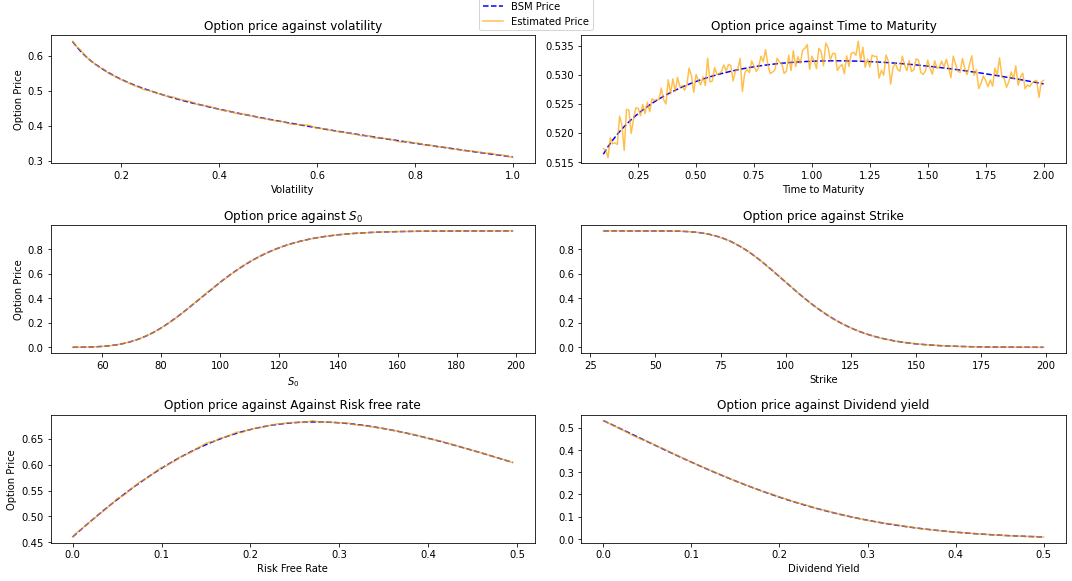

In [3071]:
fig, axs = plt.subplots(3,2, figsize=(15, 8), sharex=False, sharey=False)


# Changing Vol
axs[0,0].plot(df_vol.columns, df_vol.loc["BSM Price"].values,'--',
               color = "blue", alpha = 1, label = "BSM Price")

axs[0,0].plot(df_vol.columns, df_vol.loc["Estimated Price"].values, '-',
               color = "orange", alpha = 0.7,label = "Estimated Price")
axs[0,0].set_title("Option price against volatility")
#axs[0,0].legend()
plt.setp(axs[0,0], xlabel='Volatility')




# Changing Time to Maturity
axs[0,1].plot(df_tau.columns, df_tau.loc["BSM Price"].values,'--', 
              color = "blue", alpha = 1, label = "BSM Price")
axs[0,1].plot(df_tau.columns, df_tau.loc["Estimated Price"].values, '-',
              color = "orange", alpha = 0.7,label = "Estimated Price")
axs[0,1].set_title("Option price against Time to Maturity")
#axs[0].plot(df_tau.columns, df_tau.loc["CI_lower"].values, '--', color = "purple", alpha = 0.4, label = "Upper Confidence Interval")
#axs[0].plot(df_tau.columns, df_tau.loc["CI_upper"].values, '--', color = "blue", alpha = 0.4, label = "Lower Confidence Interval")
#axs[0,1].legend()
plt.setp(axs[0,1], xlabel='Time to Maturity')

# Changing S_0
axs[1, 0].plot(df_s0.columns, df_s0.loc["BSM Price"].values,'--', 
              color = "blue", alpha = 1, label = "BSM Price")
axs[1, 0].plot(df_s0.columns, df_s0.loc["Estimated Price"].values, '-',
               color = "orange", alpha = 0.7,label = "Estimated Price")
axs[1, 0].set_title("Option price against $S_0$")
plt.setp(axs[1,0], xlabel='$S_0$')
#axs[1, 0].legend()


# Changing Strike
axs[1,1].plot(df_strike.columns, df_strike.loc["BSM Price"].values,'--',
           color = "blue", alpha = 1, label = "BSM Price")
axs[1,1].plot(df_strike.columns, df_strike.loc["Estimated Price"].values, '-',
            color = "orange", alpha = 0.7,label = "Estimated Price")
axs[1,1].set_title("Option price against " + df_strike.columns.name)
#axs[1,1].legend()
plt.setp(axs[1,1], xlabel='Strike')

# Changing r
axs[2, 0].plot(df_rate.columns, df_rate.loc["BSM Price"].values,'--',
               color = "blue", alpha = 1, label = "BSM Price")
axs[2, 0].plot(df_rate.columns, df_rate.loc["Estimated Price"].values, '-',
               color = "orange", alpha = 0.7,label = "Estimated Price")
axs[2, 0].set_title("Option price against Against Risk free rate")
#axs[2,0].legend()
plt.setp(axs[2,0], xlabel='Risk Free Rate')

#Changing Dividend

axs[2, 1].plot(df_div.columns, df_div.loc["BSM Price"].values,'--',
               color = "blue", alpha = 1, label = "BSM Price")
axs[2, 1].plot(df_div.columns, df_div.loc["Estimated Price"].values, '-',
               color = "orange", alpha = 0.7,label = "Estimated Price")
axs[2, 1].set_title("Option price against Dividend yield")
#axs[2,1].tick_params(axis ='x', rotation= 35)
#axs[2,1].legend()
plt.setp(axs[2,1], xlabel='Dividend Yield')






# set labels
# plt.setp(axs[-1, :], xlabel='x axis label')
plt.setp(axs[:, 0], ylabel='Option Price')

fig.tight_layout()

handles, labels = axs[0,1].get_legend_handles_labels()
print(axs[0,1].get_legend_handles_labels())
fig.legend(handles, labels, loc='upper center', borderaxespad=-.2)


#plt.savefig('Image/Changing Parameter Summary.png')

#### Standard Error

([<matplotlib.lines.Line2D object at 0x000001CDC5F57820>], ['Standard Error'])


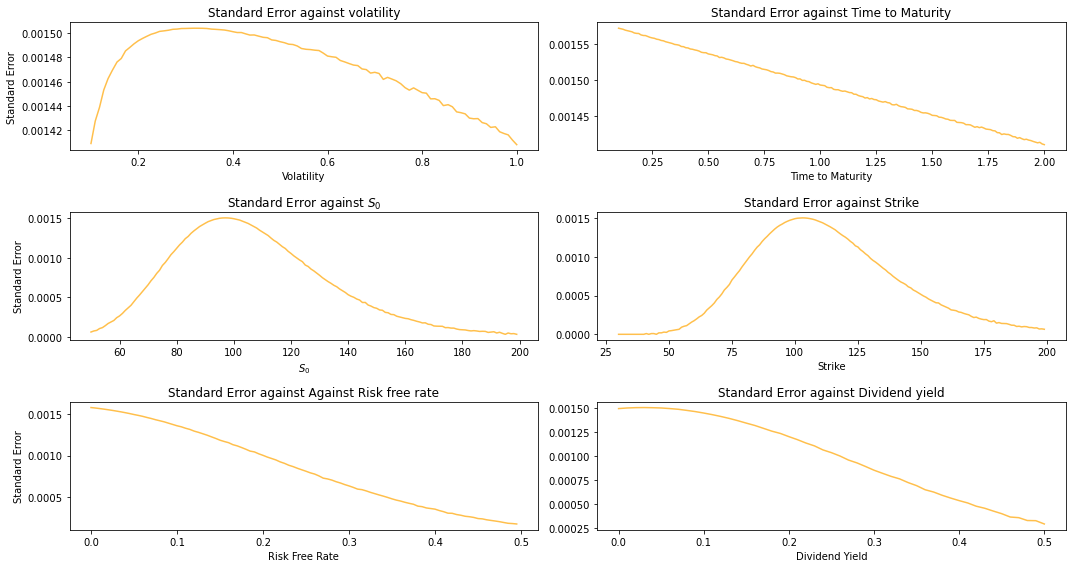

In [3069]:
fig, axs = plt.subplots(3,2, figsize=(15, 8), sharex=False, sharey=False)


# Changing Vol
axs[0,0].plot(df_vol.columns, df_vol.loc["Standard Error"].values, '-',
               color = "orange", alpha = 0.7,label = "Standard Error")
axs[0,0].set_title("Standard Error against volatility")
#axs[0,0].legend()
plt.setp(axs[0,0], xlabel='Volatility')




# Changing Time to Maturity
axs[0,1].plot(df_tau.columns, df_tau.loc["Standard Error"].values, '-',
              color = "orange", alpha = 0.7,label = "Standard Error")
axs[0,1].set_title("Standard Error against Time to Maturity")

plt.setp(axs[0,1], xlabel='Time to Maturity')

# Changing S_0

axs[1, 0].plot(df_s0.columns, df_s0.loc["Standard Error"].values, '-',
               color = "orange", alpha = 0.7,label = "Standard Error")
axs[1, 0].set_title("Standard Error against $S_0$")
plt.setp(axs[1,0], xlabel='$S_0$')
#axs[1, 0].legend()


# Changing Strike
axs[1,1].plot(df_strike.columns, df_strike.loc["Standard Error"].values, '-',
            color = "orange", alpha = 0.7,label = "Standard Error")
axs[1,1].set_title("Standard Error against " + df_strike.columns.name)
#axs[1,1].legend()
plt.setp(axs[1,1], xlabel='Strike')

# Changing r
axs[2, 0].plot(df_rate.columns, df_rate.loc["Standard Error"].values, '-',
               color = "orange", alpha = 0.7,label = "Standard Error")
axs[2, 0].set_title("Standard Error against Against Risk free rate")
#axs[2,0].legend()
plt.setp(axs[2,0], xlabel='Risk Free Rate')

#Changing Dividend
axs[2, 1].plot(df_div.columns, df_div.loc["Standard Error"].values, '-',
               color = "orange", alpha = 0.7,label = "Standard Error")
axs[2, 1].set_title("Standard Error against Dividend yield")
#axs[2,1].tick_params(axis ='x', rotation= 35)
#axs[2,1].legend()
plt.setp(axs[2,1], xlabel='Dividend Yield')






# set labels
# plt.setp(axs[-1, :], xlabel='x axis label')
plt.setp(axs[:, 0], ylabel='Standard Error')

fig.tight_layout()

handles, labels = axs[0,1].get_legend_handles_labels()
print(axs[0,1].get_legend_handles_labels())
#fig.legend(handles, labels, loc='upper center', borderaxespad=-.2)


#plt.savefig('Image/Changing Parameter Summary - Standard Error.png')

#### Relative Error

([<matplotlib.lines.Line2D object at 0x000001CDC3C745B0>], ['Relative Error'])


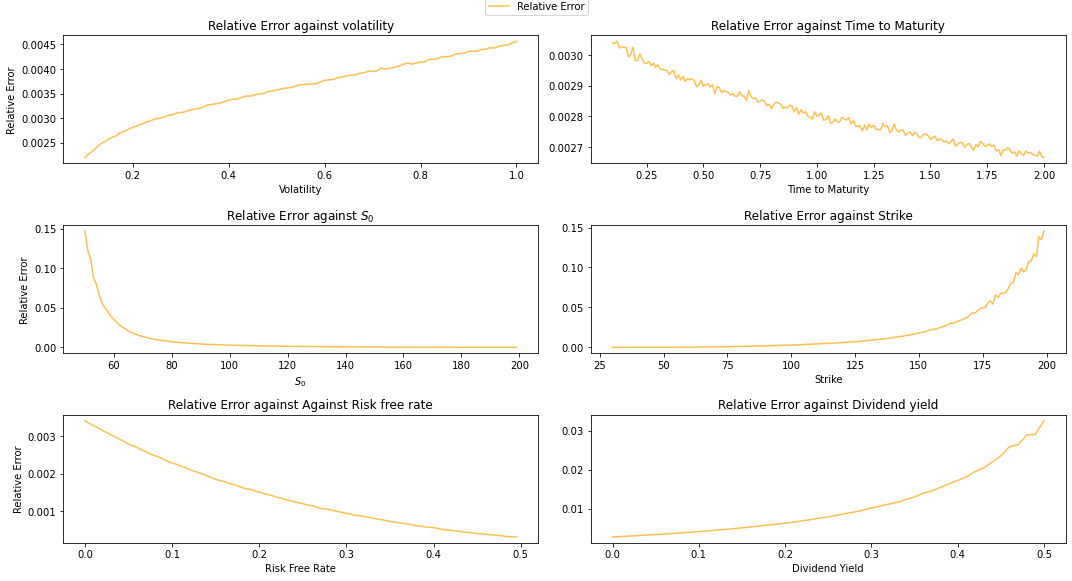

In [3067]:
fig, axs = plt.subplots(3,2, figsize=(15, 8), sharex=False, sharey=False)


# Changing Vol
axs[0,0].plot(df_vol.columns, df_vol.loc["Relative Error"].values, '-',
               color = "orange", alpha = 0.7,label = "Relative Error")
axs[0,0].set_title("Relative Error against volatility")
#axs[0,0].legend()
plt.setp(axs[0,0], xlabel='Volatility')




# Changing Time to Maturity
axs[0,1].plot(df_tau.columns, df_tau.loc["Relative Error"].values, '-',
              color = "orange", alpha = 0.7,label = "Relative Error")
axs[0,1].set_title("Relative Error against Time to Maturity")

plt.setp(axs[0,1], xlabel='Time to Maturity')

# Changing S_0

axs[1, 0].plot(df_s0.columns, df_s0.loc["Relative Error"].values, '-',
               color = "orange", alpha = 0.7,label = "Relative Error")
axs[1, 0].set_title("Relative Error against $S_0$")
plt.setp(axs[1,0], xlabel='$S_0$')
#axs[1, 0].legend()


# Changing Strike
axs[1,1].plot(df_strike.columns, df_strike.loc["Relative Error"].values, '-',
            color = "orange", alpha = 0.7,label = "Relative Error")
axs[1,1].set_title("Relative Error against " + df_strike.columns.name)
#axs[1,1].legend()
plt.setp(axs[1,1], xlabel='Strike')

# Changing r
axs[2, 0].plot(df_rate.columns, df_rate.loc["Relative Error"].values, '-',
               color = "orange", alpha = 0.7,label = "Relative Error")
axs[2, 0].set_title("Relative Error against Against Risk free rate")
#axs[2,0].legend()
plt.setp(axs[2,0], xlabel='Risk Free Rate')

#Changing Dividend
axs[2, 1].plot(df_div.columns, df_div.loc["Relative Error"].values, '-',
               color = "orange", alpha = 0.7,label = "Relative Error")
axs[2, 1].set_title("Relative Error against Dividend yield")
#axs[2,1].tick_params(axis ='x', rotation= 35)
#axs[2,1].legend()
plt.setp(axs[2,1], xlabel='Dividend Yield')






# set labels
# plt.setp(axs[-1, :], xlabel='x axis label')
plt.setp(axs[:, 0], ylabel='Relative Error')

fig.tight_layout()

handles, labels = axs[0,1].get_legend_handles_labels()
print(axs[0,1].get_legend_handles_labels())
fig.legend(handles, labels, loc='upper center', borderaxespad=-.2)


#plt.savefig('Image/Changing Parameter Summary - Relative Error.png')

In [ ]:
# Time Step 
axs[3, 0].plot(df_dt.columns, df_dt.loc["BSM Price"].values,'--',
               color = "blue", alpha = 1, label = "BSM Price")
axs[3, 0].plot(df_dt.columns, df_dt.loc["Estimated Price"].values, '-',
               color = "orange", alpha = 0.7,label = "Estimated Price")
axs[3, 0].set_title("Option price against Number of timestep")
#axs[3,0].legend()
plt.setp(axs[3,0], xlabel='Number of timestep')



# Simulations
axs[3,1].plot(df_simulations.columns, df_simulations.loc["BSM Price"].values,'--',
              color = "blue", alpha = 1, label = "BSM Price")
axs[3,1].plot(df_simulations.columns, df_simulations.loc["Estimated Price"].values, '-',
              color = "orange", alpha = 0.7,label = "Estimated Price")
axs[3,1].set_title("Option price against Number of Simulation")
#axs[3,1].legend()
plt.setp(axs[3,1], xlabel='Number of Simulation')


# 4. Antithetic

In [ ]:
# Step 2 - Calculate Payoff.
n = mc_path.shape[-1]
plt.plot(np.linspace(0,1,n), mc_path[0,0,:])
plt.plot(np.linspace(0,1,n), [100]*n, "--", alpha =0.5, color = "red")


plt.plot(0.0,100,'ro') 
plt.text(0,101,"$S_0$")

plt.plot(1.0,mc_path[0,0,:][-1],"ro")
plt.text(1.0-0.05,mc_path[0,0,:][-1]+0.25,"$S_T$")


plt.xlabel('time')
plt.grid(True)
plt.ylabel('Asset Price')
plt.title('Monte Carlo Simulated Asset Prices');
plt.xlim(0,1)
#plt.savefig('Image/Step 2 - Payoff.png')

In [2158]:
df_standard = pd.DataFrame()
for i in np.arange(1000,100000+1000,1000):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 10**1, simulations= i,
                method = "dlnS", cash_f = "cash",
                     flag = "call", antithetic = False)
    df1 = mc.mc_process()
    df1.columns = [i] # formatting 3 significant figure
    df_standard = pd.concat([df_standard, df1], axis=1)
    
df_standard.columns.name = "Standard"   

In [2159]:
df_anti = pd.DataFrame()
for i in np.arange(1000,100000+1000,1000):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 10**1, simulations= i,
                method = "dlnS", cash_f = "cash",
                     flag = "call", antithetic = True)
    df1 = mc.mc_process()
    df1.columns = [i] # formatting 3 significant figure
    df_anti = pd.concat([df_anti, df1], axis=1)
    
df_anti.columns.name = "Antithetic"   

In [2767]:
df_anti.iloc[:,9]

BSM Price            0.532325
Estimated Price       0.53616
Standard Error     0.00333583
Relative Error     0.00622169
Absolute Error     0.00383565
Runtime             0.0097808
Name: 10000, dtype: object

In [2769]:
df_antithetic = pd.concat([df_standard.iloc[:,[9]],df_anti.iloc[:,[9]]], axis=1)
df_antithetic.columns.name = "Simulation"
df_antithetic = df_antithetic.T.reset_index().T
df_antithetic.columns = ["Standard", "Antithetic"]
print(df_antithetic.applymap(formatting).to_latex())

\begin{tabular}{lrr}
\toprule
{} &      Standard &    Antithetic \\
\midrule
Simulation      &  10000.000000 &  10000.000000 \\
BSM Price       &      0.532325 &      0.532325 \\
Estimated Price &      0.528788 &      0.536161 \\
Standard Error  &      0.004727 &      0.003336 \\
Relative Error  &      0.008938 &      0.006222 \\
Absolute Error  &      0.003536 &      0.003836 \\
Runtime         &      0.005946 &      0.009781 \\
\bottomrule
\end{tabular}



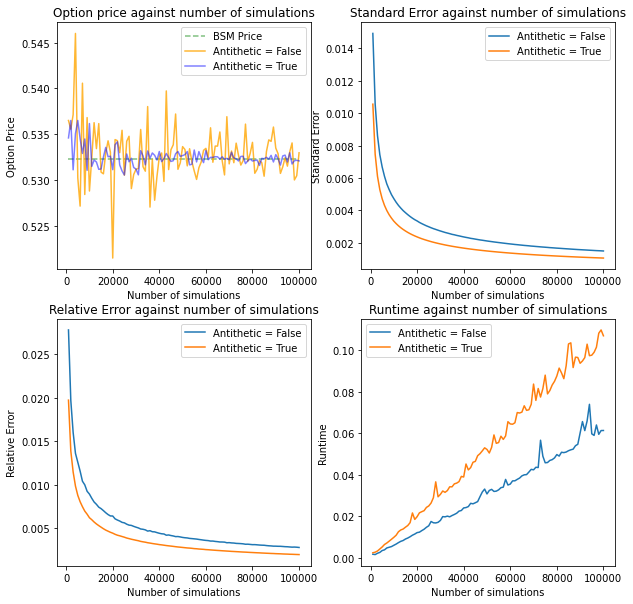

In [2160]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))


axs[0, 0].plot(df_standard.columns, df_standard.loc["BSM Price"].values,'--',
               color = "green", alpha = 0.5, label = "BSM Price")

axs[0, 0].plot(df_standard.columns, df_standard.loc["Estimated Price"].values,
               '-', color = "orange", alpha = 0.8, label = "Antithetic = False")
axs[0, 0].plot(df_anti.columns, df_anti.loc["Estimated Price"].values,
               '-', color = "blue", alpha = 0.5, label = "Antithetic = True")
axs[0, 0].set_title("Option price against number of simulations")
axs[0, 0].legend()

axs[0, 1].plot(df_standard.columns, df_standard.loc["Standard Error"].values, label = "Antithetic = False")
axs[0, 1].plot(df_anti.columns, df_anti.loc["Standard Error"].values, label = "Antithetic = True")
axs[0, 1].set_title("Standard Error against number of simulations")
axs[0, 1].legend()

axs[1, 0].plot(df_standard.columns, df_standard.loc["Relative Error"].values, label = "Antithetic = False")
axs[1, 0].plot(df_anti.columns, df_anti.loc["Relative Error"].values, label = "Antithetic = True")
axs[1, 0].set_title("Relative Error against number of simulations")
axs[1,0].legend()


axs[1, 1].plot(df_standard.columns, df_standard.loc["Runtime"].values, label = "Antithetic = False")
axs[1, 1].plot(df_anti.columns, df_anti.loc["Runtime"].values, label = "Antithetic = True")
axs[1, 1].set_title("Runtime against number of simulations")
axs[1, 1].legend()



plt.setp(axs[:, :], xlabel='Number of simulations')
plt.setp(axs[0, 0], ylabel='Option Price')
plt.setp(axs[0, 1], ylabel='Standard Error')
plt.setp(axs[1, 0], ylabel='Relative Error')
plt.setp(axs[1, 1], ylabel='Runtime')

#plt.savefig('Image/Comparing Antithetic Variate Method.png')

# Asset or Nothing Call option

In [3123]:
anti_flag = True
cash_or_asset = "asset"
cp = "call"

In [3124]:
%%time
# volatility
df_asset_vol = pd.DataFrame()
for i in np.linspace(0.1,1,100):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = i,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = cash_or_asset, flag = cp, antithetic = anti_flag)
    df1 = mc.mc_process()
    df1.columns = [float("{:.3}".format(i))] # formatting 3 significant figure
    df_asset_vol = pd.concat([df_asset_vol, df1], axis=1)
    
df_asset_vol.columns.name = "Vol"   


# strike
df_asset_strike = pd.DataFrame()
for i in np.arange(50,200,5):

    mc = Monte_Carlo(stock = 100, strike = i, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = cash_or_asset, flag = cp, antithetic = anti_flag)
    df1 = mc.mc_process()
    df1.columns = [i] 
    df_asset_strike = pd.concat([df_asset_strike, df1], axis=1)
    
df_asset_strike.columns.name = "Strike"   



# initial price
df_asset_s0 = pd.DataFrame()
for i in np.arange(50,200,5):

    mc = Monte_Carlo(stock = i, strike = 100, t=0, T=1,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = cash_or_asset, flag = cp, antithetic = anti_flag)
    df1 = mc.mc_process()
    df1.columns = [i] 
    df_asset_s0 = pd.concat([df_asset_s0, df1], axis=1)
    
df_asset_s0.columns.name = "$S_0$"   


df_asset_tau = pd.DataFrame()
for i in np.arange(0.02,2.1,0.02):

    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=i,
                rate= 0.05, dividend= 0, vol = 0.2,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = cash_or_asset, flag = cp, antithetic = anti_flag)
    df1 = mc.mc_process()
    df1.columns = [i] 
    df_asset_tau = pd.concat([df_asset_tau, df1], axis=1)
    
df_asset_tau.columns.name = "Tau"   


#dividend
df_asset_div = pd.DataFrame()
for i in np.linspace(0.0,0.5,51):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= 0.05, dividend= i, vol = 0.2,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = cash_or_asset, flag = cp, antithetic = anti_flag)
    df1 = mc.mc_process()
    df1.columns = [float("{:.3}".format(i))] # formatting 3 significant figure
    df_asset_div = pd.concat([df_asset_div, df1], axis=1)
    
df_asset_div.columns.name = "Dividend"   



#risk-free rate
df_asset_rate = pd.DataFrame()
for i in np.linspace(0.00,0.20,101):
    mc = Monte_Carlo(stock = 100, strike = 100, t=0, T=1,
                rate= i, dividend= 0, vol = 0.2,
                timestep= 1, simulations= 10**5,
                method = "dlnS", cash_f = cash_or_asset, flag = cp, antithetic = anti_flag)
    df1 = mc.mc_process()
    df1.columns = [float("{:.3}".format(i))] # formatting 3 significant figure
    df_asset_rate = pd.concat([df_asset_rate, df1], axis=1)
    
df_asset_rate.columns.name = "Rate"   

Wall time: 5.9 s


## Option Price

([<matplotlib.lines.Line2D object at 0x000001CD15C24280>, <matplotlib.lines.Line2D object at 0x000001CC3871A190>], ['BSM Price', 'Estimated Price'])


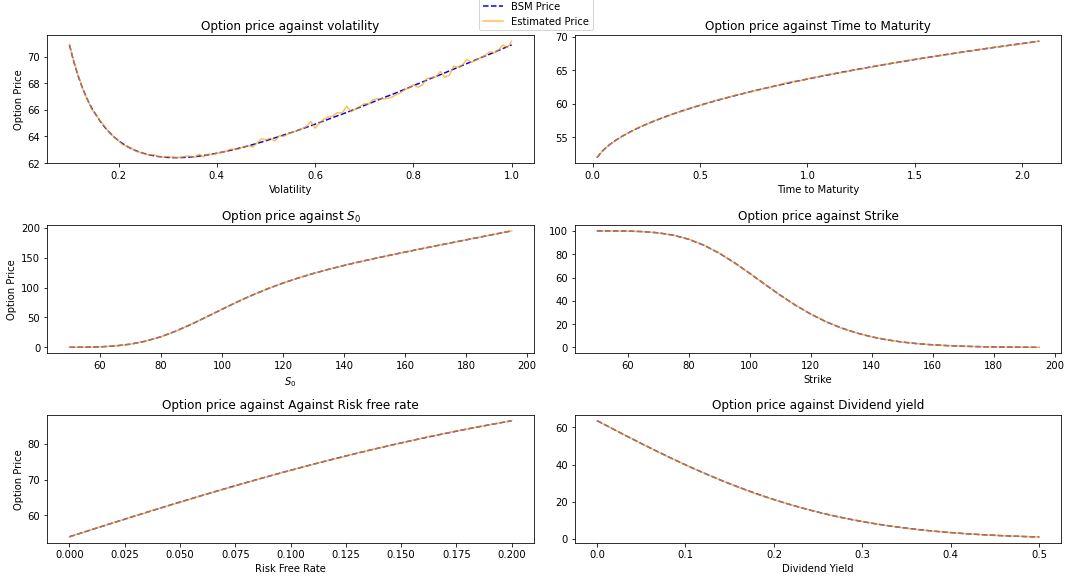

In [3126]:
fig, axs = plt.subplots(3,2, figsize=(15, 8), sharex=False, sharey=False)


# Changing Vol
axs[0,0].plot(df_asset_vol.columns, df_asset_vol.loc["BSM Price"].values,'--',
               color = "blue", alpha = 1, label = "BSM Price")

axs[0,0].plot(df_asset_vol.columns, df_asset_vol.loc["Estimated Price"].values, '-',
               color = "orange", alpha = 0.7,label = "Estimated Price")
axs[0,0].set_title("Option price against volatility")
#axs[0,0].legend()
plt.setp(axs[0,0], xlabel='Volatility')




# Changing Time to Maturity
axs[0,1].plot(df_asset_tau.columns, df_asset_tau.loc["BSM Price"].values,'--', 
              color = "blue", alpha = 1, label = "BSM Price")
axs[0,1].plot(df_asset_tau.columns, df_asset_tau.loc["Estimated Price"].values, '-',
              color = "orange", alpha = 0.7,label = "Estimated Price")
axs[0,1].set_title("Option price against Time to Maturity")
#axs[0].plot(df_asset_tau.columns, df_asset_tau.loc["CI_lower"].values, '--', color = "purple", alpha = 0.4, label = "Upper Confidence Interval")
#axs[0].plot(df_asset_tau.columns, df_asset_tau.loc["CI_upper"].values, '--', color = "blue", alpha = 0.4, label = "Lower Confidence Interval")
#axs[0,1].legend()
plt.setp(axs[0,1], xlabel='Time to Maturity')

# Changing S_0
axs[1, 0].plot(df_asset_s0.columns, df_asset_s0.loc["BSM Price"].values,'--', 
              color = "blue", alpha = 1, label = "BSM Price")
axs[1, 0].plot(df_asset_s0.columns, df_asset_s0.loc["Estimated Price"].values, '-',
               color = "orange", alpha = 0.7,label = "Estimated Price")
axs[1, 0].set_title("Option price against $S_0$")
plt.setp(axs[1,0], xlabel='$S_0$')
#axs[1, 0].legend()


# Changing Strike
axs[1,1].plot(df_asset_strike.columns, df_asset_strike.loc["BSM Price"].values,'--',
           color = "blue", alpha = 1, label = "BSM Price")
axs[1,1].plot(df_asset_strike.columns, df_asset_strike.loc["Estimated Price"].values, '-',
            color = "orange", alpha = 0.7,label = "Estimated Price")
axs[1,1].set_title("Option price against " + df_asset_strike.columns.name)
#axs[1,1].legend()
plt.setp(axs[1,1], xlabel='Strike')

# Changing r
axs[2, 0].plot(df_asset_rate.columns, df_asset_rate.loc["BSM Price"].values,'--',
               color = "blue", alpha = 1, label = "BSM Price")
axs[2, 0].plot(df_asset_rate.columns, df_asset_rate.loc["Estimated Price"].values, '-',
               color = "orange", alpha = 0.7,label = "Estimated Price")
axs[2, 0].set_title("Option price against Against Risk free rate")
#axs[2,0].legend()
plt.setp(axs[2,0], xlabel='Risk Free Rate')

#Changing Dividend

axs[2, 1].plot(df_asset_div.columns, df_asset_div.loc["BSM Price"].values,'--',
               color = "blue", alpha = 1, label = "BSM Price")
axs[2, 1].plot(df_asset_div.columns, df_asset_div.loc["Estimated Price"].values, '-',
               color = "orange", alpha = 0.7,label = "Estimated Price")
axs[2, 1].set_title("Option price against Dividend yield")
#axs[2,1].tick_params(axis ='x', rotation= 35)
#axs[2,1].legend()
plt.setp(axs[2,1], xlabel='Dividend Yield')






# set labels
# plt.setp(axs[-1, :], xlabel='x axis label')
plt.setp(axs[:, 0], ylabel='Option Price')

fig.tight_layout()

handles, labels = axs[0,1].get_legend_handles_labels()
print(axs[0,1].get_legend_handles_labels())
fig.legend(handles, labels, loc='upper center', borderaxespad=-.2)


#plt.savefig('Image/Changing Parameter Summary.png')

## Standard Error

([<matplotlib.lines.Line2D object at 0x000001CE08E6A1F0>], ['Standard Error'])


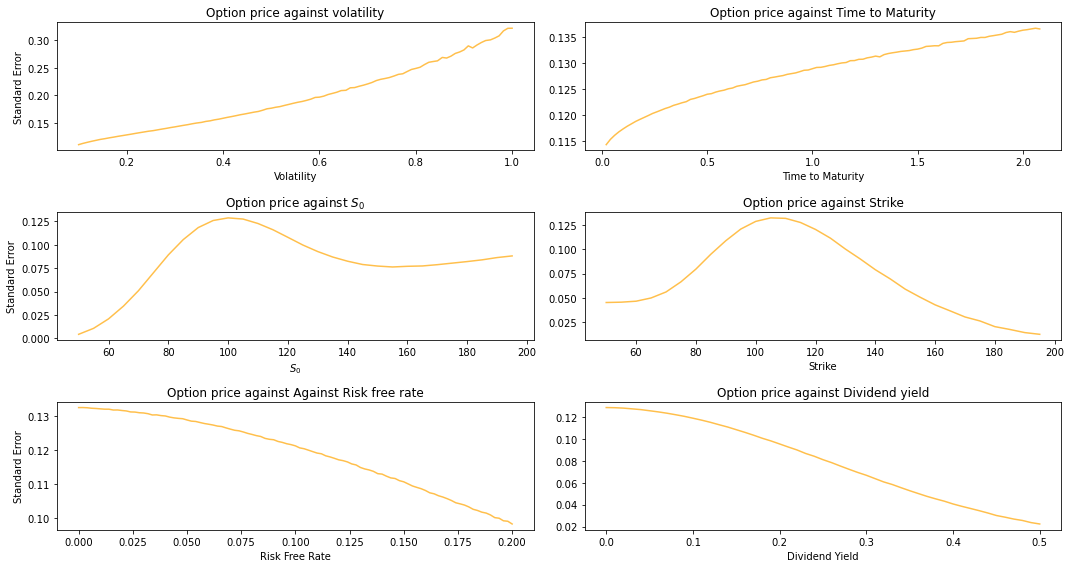

In [3128]:
fig, axs = plt.subplots(3,2, figsize=(15, 8), sharex=False, sharey=False)


# Changing Vol
axs[0,0].plot(df_asset_vol.columns, df_asset_vol.loc["Standard Error"].values, '-',
               color = "orange", alpha = 0.7,label = "Standard Error")
axs[0,0].set_title("Option price against volatility")
#axs[0,0].legend()
plt.setp(axs[0,0], xlabel='Volatility')




# Changing Time to Maturity
axs[0,1].plot(df_asset_tau.columns, df_asset_tau.loc["Standard Error"].values, '-',
              color = "orange", alpha = 0.7,label = "Standard Error")
axs[0,1].set_title("Option price against Time to Maturity")

plt.setp(axs[0,1], xlabel='Time to Maturity')

# Changing S_0

axs[1, 0].plot(df_asset_s0.columns, df_asset_s0.loc["Standard Error"].values, '-',
               color = "orange", alpha = 0.7,label = "Standard Error")
axs[1, 0].set_title("Option price against $S_0$")
plt.setp(axs[1,0], xlabel='$S_0$')
#axs[1, 0].legend()


# Changing Strike
axs[1,1].plot(df_asset_strike.columns, df_asset_strike.loc["Standard Error"].values, '-',
            color = "orange", alpha = 0.7,label = "Standard Error")
axs[1,1].set_title("Option price against " + df_asset_strike.columns.name)
#axs[1,1].legend()
plt.setp(axs[1,1], xlabel='Strike')

# Changing r
axs[2, 0].plot(df_asset_rate.columns, df_asset_rate.loc["Standard Error"].values, '-',
               color = "orange", alpha = 0.7,label = "Standard Error")
axs[2, 0].set_title("Option price against Against Risk free rate")
#axs[2,0].legend()
plt.setp(axs[2,0], xlabel='Risk Free Rate')

#Changing Dividend
axs[2, 1].plot(df_asset_div.columns, df_asset_div.loc["Standard Error"].values, '-',
               color = "orange", alpha = 0.7,label = "Standard Error")
axs[2, 1].set_title("Option price against Dividend yield")
#axs[2,1].tick_params(axis ='x', rotation= 35)
#axs[2,1].legend()
plt.setp(axs[2,1], xlabel='Dividend Yield')






# set labels
# plt.setp(axs[-1, :], xlabel='x axis label')
plt.setp(axs[:, 0], ylabel='Standard Error')

fig.tight_layout()

handles, labels = axs[0,1].get_legend_handles_labels()
print(axs[0,1].get_legend_handles_labels())
#fig.legend(handles, labels, loc='upper center', borderaxespad=-.2)


#plt.savefig('Image/Changing Parameter Summary - Standard Error.png')

## Relative Error

([<matplotlib.lines.Line2D object at 0x000001CDC5DD3A60>], ['Relative Error'])


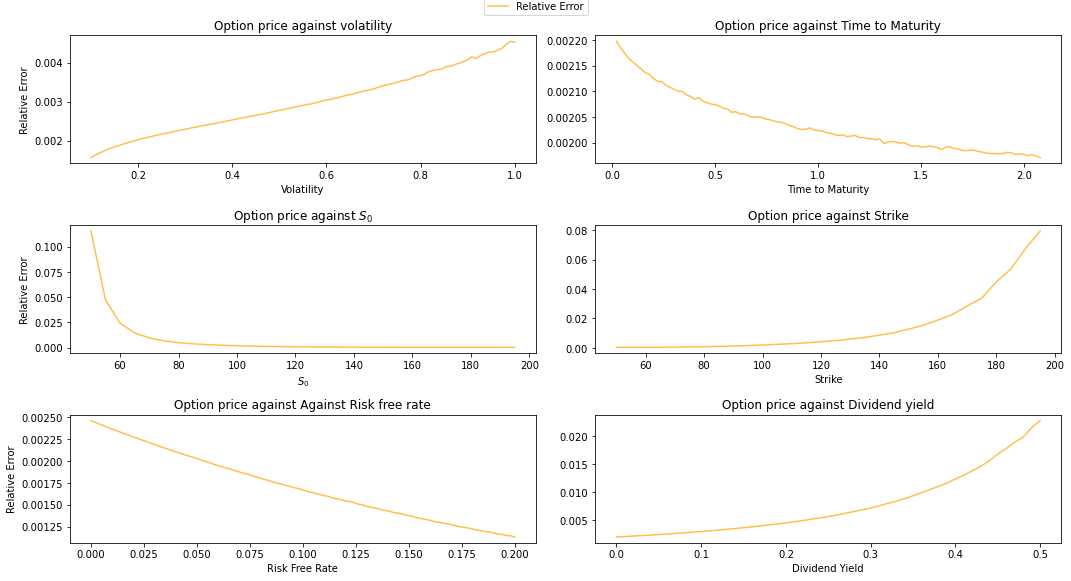

In [3129]:
fig, axs = plt.subplots(3,2, figsize=(15, 8), sharex=False, sharey=False)


# Changing Vol
axs[0,0].plot(df_asset_vol.columns, df_asset_vol.loc["Relative Error"].values, '-',
               color = "orange", alpha = 0.7,label = "Relative Error")
axs[0,0].set_title("Option price against volatility")
#axs[0,0].legend()
plt.setp(axs[0,0], xlabel='Volatility')




# Changing Time to Maturity
axs[0,1].plot(df_asset_tau.columns, df_asset_tau.loc["Relative Error"].values, '-',
              color = "orange", alpha = 0.7,label = "Relative Error")
axs[0,1].set_title("Option price against Time to Maturity")

plt.setp(axs[0,1], xlabel='Time to Maturity')

# Changing S_0

axs[1, 0].plot(df_asset_s0.columns, df_asset_s0.loc["Relative Error"].values, '-',
               color = "orange", alpha = 0.7,label = "Relative Error")
axs[1, 0].set_title("Option price against $S_0$")
plt.setp(axs[1,0], xlabel='$S_0$')
#axs[1, 0].legend()


# Changing Strike
axs[1,1].plot(df_asset_strike.columns, df_asset_strike.loc["Relative Error"].values, '-',
            color = "orange", alpha = 0.7,label = "Relative Error")
axs[1,1].set_title("Option price against " + df_asset_strike.columns.name)
#axs[1,1].legend()
plt.setp(axs[1,1], xlabel='Strike')

# Changing r
axs[2, 0].plot(df_asset_rate.columns, df_asset_rate.loc["Relative Error"].values, '-',
               color = "orange", alpha = 0.7,label = "Relative Error")
axs[2, 0].set_title("Option price against Against Risk free rate")
#axs[2,0].legend()
plt.setp(axs[2,0], xlabel='Risk Free Rate')

#Changing Dividend
axs[2, 1].plot(df_asset_div.columns, df_asset_div.loc["Relative Error"].values, '-',
               color = "orange", alpha = 0.7,label = "Relative Error")
axs[2, 1].set_title("Option price against Dividend yield")
#axs[2,1].tick_params(axis ='x', rotation= 35)
#axs[2,1].legend()
plt.setp(axs[2,1], xlabel='Dividend Yield')






# set labels
# plt.setp(axs[-1, :], xlabel='x axis label')
plt.setp(axs[:, 0], ylabel='Relative Error')

fig.tight_layout()

handles, labels = axs[0,1].get_legend_handles_labels()
print(axs[0,1].get_legend_handles_labels())
fig.legend(handles, labels, loc='upper center', borderaxespad=-.2)


#plt.savefig('Image/Changing Parameter Summary - Relative Error.png')

In [ ]:
aaa

In [1146]:
def input_value(a):
    for key, value in a.__dict__.items():
        if key not in ["s_path", "option_array"]:
            print(key,value)

In [1147]:
input_value(a)

stock 100
strike 100
t 0
T 1
tau 1
rate 0.05
dividend 0
vol 0.2
timestep 1000
simulations 10000
cash_f cash
flag call
method dS
antithetic False
d1 0.35000000000000003
d2 0.15000000000000002


a.__dict__

print(a.__dict__.keys())
print(a.__dict__.values())

REFERENCE: 
    http://janroman.dhis.org/finance/Numerical%20Methods/cumulative%20normal.pdf [Magasin]
    
    http://finmod.co.za/Better%20Approximations%20To%20Cumulative%20Normal%20Functions.pdf [West]